# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1 . Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [1]:
!pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

### Ï∂îÍ∞Ä
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/tru

In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')

### Ï∂îÍ∞Ä
#plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
### Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/192 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]

import seaborn as sns

# utils
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

import seaborn as sns
from tqdm import tqdm
import pickle
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb


import eli5
from eli5.sklearn import PermutationImportance

## 2 . Data Load

### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# import os
# print(os.getcwd())

/content


In [5]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '/content/drive/MyDrive/AILAB_Advance/train.csv'
test_path  = '/content/drive/MyDrive/AILAB_Advance/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

### 2.2 Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö©ÌôïÏù∏

#### 2.2.1 dt Ïùò Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö© ÌôïÏù∏

In [164]:
# dt.head(1)

In [165]:
# dt.info()

In [166]:
# dt.describe()

In [167]:
# dt.ÏãúÍµ∞Íµ¨.value_counts()

In [168]:
# dt.ÏïÑÌååÌä∏Î™Ö.value_counts()

In [169]:
# dt['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)'].value_counts()

In [170]:
# dt['k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)'].value_counts()

In [171]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

In [172]:
# TrainÍ≥º Test dataÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
# display(dt.head(1))
# display(dt_test.head(1))      # Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä(=Target) columnÏù¥ Ï†úÏô∏Îêú Î™®ÏäµÏûÖÎãàÎã§.

#### 2.2.2 dt_ test Ïùò Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö© ÌôïÏù∏

In [173]:
# dt_test.info()

In [174]:
### target Ï∂îÍ∞ÄÏôÄ Í∞í ÏÖãÌåÖ
dt_test['target'] = 0

In [175]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
# dt.isnull().sum()

## 3 . Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

<font color=Tomato> **concat ÌååÏùº ÎßåÎì§Í∏∞**

In [176]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [177]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

is_test
0    1118822
1       9272
Name: count, dtype: int64

In [178]:
# concat[['ÏãúÍµ∞Íµ¨','Î≤àÏßÄ','Î≥∏Î≤à','Î∂ÄÎ≤à']].head(20)

In [179]:
### Í≥†Ïú†Ìïú ÏàúÏÑú Ïù∏Îç±Ïä§Î•º Î¶¨ÏÖãÌïòÍ≥† Í∏∞Ï°¥ Ïù∏Îç±Ïä§Î•º ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞Ä
concat.reset_index(drop=True, inplace=True)
concat['index_num'] = concat.index

In [180]:
# ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÏâΩÍ≤å Î∞îÍøîÏ£ºÍ≤†ÏäµÎãàÎã§. Îã§Î•∏ ÏπºÎüºÎèÑ ÏÇ¨Ïö©Ïóê Îî∞Îùº Î∞îÍøîÏ£ºÏÖîÎèÑ Îê©ÎãàÎã§!
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})

In [181]:
# concat.isnull().sum()

In [182]:
# concat.info()

ÏïÑÌååÌä∏Î™Ö, Î≤àÏßÄ, Î≥∏Î≤à, Î∂ÄÎ≤à, Í≤∞Ï∏°Ïπò Íµ¨Î∂ÑÍ∞í ÎßåÎì§Í≥† |

ÏïÑÌååÌä∏Î™Ö, Î≤àÏßÄ, Î≥∏Î≤à, Î∂ÄÎ≤à ÏÇ≠Ï†ú

In [183]:
### 'Íµ¨Î∂Ñ' 'Íµ¨Î∂Ñdate' Ïª¨Îüº ÏÉùÏÑ±
#concat['Íµ¨Î∂Ñ'] = concat['ÏãúÍµ∞Íµ¨'] + ' ' + concat['Î≤àÏßÄ'] + ' ' + concat['ÏïÑÌååÌä∏Î™Ö']  Ï†ÑÏö©Î©¥Ï†ÅÍπåÏßÄ Ìè¨Ìï®ÏãúÏºúÏÑú Íµ¨Î∂ÑÏúºÎ°ú Î∞îÍøà
concat['Íµ¨Î∂Ñ'] = concat['ÏãúÍµ∞Íµ¨'].astype(str) + ' ' + concat['Î≤àÏßÄ'].astype(str) + ' ' + concat['ÏïÑÌååÌä∏Î™Ö'].astype(str) + ' ' + concat['Ï†ÑÏö©Î©¥Ï†Å'].astype(str)
concat['Íµ¨Î∂Ñdate'] = concat['Íµ¨Î∂Ñ'] + ' ' + concat['Í≥ÑÏïΩÎÖÑÏõî'].astype(str)



### concat['Íµ¨Î∂Ñnum'] ÎßåÎì§Í∏∞
mean_target = concat.groupby('Íµ¨Î∂Ñ')['target'].mean().reset_index()
#mean_target = mean_target.sort_values(by=['Íµ¨Î∂Ñ'])

# Ïù∏Îç±Ïä§Î•º Î¶¨ÏÖãÌïòÍ≥† Í∏∞Ï°¥ Ïù∏Îç±Ïä§Î•º ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞Ä
mean_target.reset_index(drop=True, inplace=True)
mean_target['Íµ¨Î∂Ñnum'] = mean_target.index

# Î∂àÌïÑÏöîÍ∞í ÏÇ≠Ï†ú
mean_target = mean_target.drop(columns=['target'])

### ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
concat = pd.merge(concat, mean_target, on='Íµ¨Î∂Ñ', how='left')

In [184]:
concat.drop(columns=['ÏïÑÌååÌä∏Î™Ö','Î≤àÏßÄ','Î≥∏Î≤à','Î∂ÄÎ≤à'], inplace=True)

Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îß§Îß§ ÏïàÎêú Í≤ÉÏúºÎ°ú ? Îß§Îß§Îêú Í≤ÉÏúºÎ°ú? <font color=Tomato> Îß§Îß§Îêú Í≤ÉÏúºÎ°ú ÏÇ≠Ï†ú ÏïàÌï®

Ìï¥Ï†úÏÇ¨Ïú†ÏùºÏùÑ Í∞ÄÏßÑ Í∞í Í∞ØÏàò ÌôïÏù∏

In [185]:
print("Ìï¥Ï†úÏÇ¨Ïú†Ïùº Í∞ÄÏßÑ Í∞í: ",len(concat), "-" ,concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].isnull().sum(), "=", len(concat) - concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].isnull().sum())

Ìï¥Ï†úÏÇ¨Ïú†Ïùº Í∞ÄÏßÑ Í∞í:  1128094 - 1121899 = 6195


In [186]:
###ÎëêÍ∞ú Í∞í Ï∞æÎäî ÏΩîÎìú
#df[df[column].isin([value1, value2])]

In [187]:
###ÌïúÍ∞ú Í∞í Ï∞æÎäî ÏΩîÎìú
#concat[concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'] != None]['target']

In [188]:
###
concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].isnull().sum(), concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].isna().sum()

(1121899, 1121899)

In [189]:
###
concat.drop(columns=['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'], inplace=True)

'Í≥ÑÏïΩÏùº' 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ' ÏÇ≠Ï†ú

In [190]:
###
concat.drop(columns=['Í≥ÑÏïΩÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'], inplace=True)

K Í∞í Ï†ïÎ¶¨

ÏùòÎØ∏ ÏûàÎã§. ÏóÜÎã§.
<font color=gray>
- ÏÇ≠Ï†ú 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)'
- ÏÇ≠Ï†ú 'k-Ï†ÑÌôîÎ≤àÌò∏',
- ÏÇ≠Ï†ú 'k-Ìå©Ïä§Î≤àÌò∏',
- ÏÇ≠Ï†ú 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob',
- ÏÇ≠Ï†ú 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)',
- ÏÇ≠Ï†ú 'k-Í¥ÄÎ¶¨Î∞©Ïãù',
- ÏÇ≠Ï†ú 'k-Î≥µÎèÑÏú†Ìòï',
</font>  
- 'k-ÎÇúÎ∞©Î∞©Ïãù',
- 'k-Ï†ÑÏ≤¥ÎèôÏàò',
- 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
- 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)',
<font color=gray>
- ÏÇ≠Ï†ú 'k-ÏãúÌñâÏÇ¨',
- ÏÇ≠Ï†ú 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
</font>  
- 'k-Ïó∞Î©¥Ï†Å',
<font color=gray>
- ÏÇ≠Ï†ú 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
- ÏÇ≠Ï†ú 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
</font>  
- 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
- 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
- 'k-85„é°~135„é°Ïù¥Ìïò',
- 'k-135„é°Ï¥àÍ≥º',
<font color=gray>
- ÏÇ≠Ï†ú 'k-ÌôàÌéòÏù¥ÏßÄ',
- ÏÇ≠Ï†ú 'k-Îì±Î°ùÏùºÏûê',
- ÏÇ≠Ï†ú 'k-ÏàòÏ†ïÏùºÏûê' - Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ìï¥Î≥¥Îãà Ï†ÑÌòÄ Ïó∞Í¥ÄÏóÜÏñ¥Î≥¥ÏûÑ
</font>  




In [191]:
###
concat.drop(columns=['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)','k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï',
                     'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
                     'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
                     'k-ÌôàÌéòÏù¥ÏßÄ', 'k-Îì±Î°ùÏùºÏûê','k-ÏàòÏ†ïÏùºÏûê'], inplace=True)

Í∏∞ÌÉÄ ÎÇ¥Ïö© Ï†ïÎ¶¨

ÏùòÎØ∏ ÏûàÎã§ ÏóÜÎã§.
<font color=gray>
- ÏÇ≠Ï†ú 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏',
- ÏÇ≠Ï†ú 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
- ÏÇ≠Ï†ú 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï',
- ÏÇ≠Ï†ú 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',       
</font>
- 'Í±¥Ï∂ïÎ©¥Ï†Å',
- 'Ï£ºÏ∞®ÎåÄÏàò',
<font color=gray>
- 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
- 'Îã®ÏßÄÏäπÏù∏Ïùº',
- 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä',
- 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
</font>
- 'Ï¢åÌëúX',
- 'Ï¢åÌëúY',
<font color=gray>
- 'Îã®ÏßÄÏã†Ï≤≠Ïùº',

In [192]:
concat.drop(columns=['Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú','Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº'], inplace=True)

In [193]:
len(concat.columns), concat.columns

(25,
 Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò',
        'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
        'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
        'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate',
        'Íµ¨Î∂Ñnum'],
       dtype='object'))

In [194]:
concat['k-85„é°~135„é°Ïù¥Ìïò'].value_counts()

k-85„é°~135„é°Ïù¥Ìïò
0.0      100377
90.0       3254
486.0      3068
900.0      2605
456.0      2573
          ...  
9.0          38
487.0        22
220.0        15
2.0          12
494.0         2
Name: count, Length: 244, dtype: int64

In [195]:
concat['k-135„é°Ï¥àÍ≥º'].value_counts()

k-135„é°Ï¥àÍ≥º
70.0    329
Name: count, dtype: int64

In [196]:
concat.columns

Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò',
       'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate',
       'Íµ¨Î∂Ñnum'],
      dtype='object')

In [197]:
a = concat.isnull().sum()

In [198]:
b = concat.count()

In [199]:
b

ÏãúÍµ∞Íµ¨                       1128094
Ï†ÑÏö©Î©¥Ï†Å                      1128094
Í≥ÑÏïΩÎÖÑÏõî                      1128094
Ï∏µ                         1128094
Í±¥Ï∂ïÎÖÑÎèÑ                      1128094
ÎèÑÎ°úÎ™Ö                       1128094
k-ÎÇúÎ∞©Î∞©Ïãù                     251969
k-Ï†ÑÏ≤¥ÎèôÏàò                     250887
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                    251969
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                 250457
k-Ïó∞Î©¥Ï†Å                      251969
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)         251924
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)     251924
k-85„é°~135„é°Ïù¥Ìïò               251924
k-135„é°Ï¥àÍ≥º                      329
Í±¥Ï∂ïÎ©¥Ï†Å                       251815
Ï£ºÏ∞®ÎåÄÏàò                       251817
Ï¢åÌëúX                        251862
Ï¢åÌëúY                        251862
target                    1128094
is_test                   1128094
index_num                 1128094
Íµ¨Î∂Ñ                        1128094
Íµ¨Î∂Ñdate                    1128094
Íµ¨Î∂Ñ

In [200]:
b/1128094

ÏãúÍµ∞Íµ¨                       1.000000
Ï†ÑÏö©Î©¥Ï†Å                      1.000000
Í≥ÑÏïΩÎÖÑÏõî                      1.000000
Ï∏µ                         1.000000
Í±¥Ï∂ïÎÖÑÎèÑ                      1.000000
ÎèÑÎ°úÎ™Ö                       1.000000
k-ÎÇúÎ∞©Î∞©Ïãù                    0.223358
k-Ï†ÑÏ≤¥ÎèôÏàò                    0.222399
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0.223358
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                0.222018
k-Ïó∞Î©¥Ï†Å                     0.223358
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)        0.223318
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)    0.223318
k-85„é°~135„é°Ïù¥Ìïò              0.223318
k-135„é°Ï¥àÍ≥º                  0.000292
Í±¥Ï∂ïÎ©¥Ï†Å                      0.223222
Ï£ºÏ∞®ÎåÄÏàò                      0.223223
Ï¢åÌëúX                       0.223263
Ï¢åÌëúY                       0.223263
target                    1.000000
is_test                   1.000000
index_num                 1.000000
Íµ¨Î∂Ñ                        1.000000
Íµ¨Î∂Ñdate           

In [201]:
a = concat[concat['is_test']==1]

In [202]:
a.count() / 9272  # ÎåÄÎûµ 30ÌçºÏÑºÌä∏ k Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏùå

ÏãúÍµ∞Íµ¨                       1.000000
Ï†ÑÏö©Î©¥Ï†Å                      1.000000
Í≥ÑÏïΩÎÖÑÏõî                      1.000000
Ï∏µ                         1.000000
Í±¥Ï∂ïÎÖÑÎèÑ                      1.000000
ÎèÑÎ°úÎ™Ö                       1.000000
k-ÎÇúÎ∞©Î∞©Ïãù                    0.292278
k-Ï†ÑÏ≤¥ÎèôÏàò                    0.290660
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0.292278
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                0.290444
k-Ïó∞Î©¥Ï†Å                     0.292278
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)        0.292278
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)    0.292278
k-85„é°~135„é°Ïù¥Ìïò              0.292278
k-135„é°Ï¥àÍ≥º                  0.000216
Í±¥Ï∂ïÎ©¥Ï†Å                      0.291954
Ï£ºÏ∞®ÎåÄÏàò                      0.292170
Ï¢åÌëúX                       0.292278
Ï¢åÌëúY                       0.292278
target                    1.000000
is_test                   1.000000
index_num                 1.000000
Íµ¨Î∂Ñ                        1.000000
Íµ¨Î∂Ñdate           

In [203]:
concat['k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)'].value_counts()

k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)
ÏÇºÏÑ±Î¨ºÏÇ∞         14259
ÎåÄÏö∞Í±¥ÏÑ§         11549
ÌòÑÎåÄÍ±¥ÏÑ§         10575
ÎåÄÌïúÏ£ºÌÉùÍ≥µÏÇ¨        7665
GSÍ±¥ÏÑ§          7015
             ...  
ÎëêÏÇ∞               5
Ïã†ÏòÅÍ±¥ÏÑ§             3
ÏûêÏù¥ÏóêÏä§Ïï§Îîî(Ï£º)        2
ÌòúÎ¶ºÍ±¥ÏÑ§             1
ÏÇºÏùµÍ±¥ÏÑ§(Ï£º)          1
Name: count, Length: 344, dtype: int64

##### Ï∞∏Í≥†

In [204]:
# ÌñâÏùò ÎÑêÍ∞íÏùÑ Ï∞æÎäî ÏΩîÎìú
concat.isna().sum(axis=1).count()

1128094

In [205]:
#### Ï∞∏Í≥† ÏòàÏãú

# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
np.random.seed(0)  # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
data = np.random.choice([1, 2, 0], size=(10, 10))
df = pd.DataFrame(data, columns=[f'col{i}' for i in range(10)])

print("Original DataFrame:")
print(df)

# ÌñâÏóê Í∞íÏù¥ 1, 2Îßå ÏûàÎäî Í≤ÉÏùÑ Ï∞æÏïÑÏÑú ÏÇ≠Ï†úÌïòÎäî Ìï®Ïàò
def remove_rows_with_only_1_and_2(df):
    mask = (df == 1) | (df == 2)  # Í∞Å ÏöîÏÜåÍ∞Ä 1 ÎòêÎäî 2Ïù∏ÏßÄ ÌôïÏù∏ÌïòÎäî ÎßàÏä§ÌÅ¨
    rows_to_delete = mask.all(axis=1)  # Î™®Îì† ÏöîÏÜåÍ∞Ä 1 ÎòêÎäî 2Ïù∏ ÌñâÏùÑ Ï∞æÏùå
    df = df[~rows_to_delete]  # Ìï¥Îãπ ÌñâÏùÑ ÏÇ≠Ï†ú
    return df

# Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ìñâ ÏÇ≠Ï†ú
df_cleaned = remove_rows_with_only_1_and_2(df)

print("\nDataFrame after removing rows with only 1 and 2:")
print(df_cleaned)



Original DataFrame:
   col0  col1  col2  col3  col4  col5  col6  col7  col8  col9
0     1     2     1     2     2     0     1     0     1     1
1     1     0     2     0     0     1     2     2     2     2
2     1     2     1     1     2     0     1     0     1     2
3     2     0     1     2     2     2     1     0     1     0
4     0     1     0     1     1     1     2     2     0     1
5     1     2     1     2     0     0     1     2     2     2
6     2     0     0     0     1     0     2     1     2     0
7     1     1     0     1     1     1     1     1     1     0
8     1     0     2     2     2     1     2     2     2     1
9     2     0     1     2     0     1     0     1     2     0

DataFrame after removing rows with only 1 and 2:
   col0  col1  col2  col3  col4  col5  col6  col7  col8  col9
0     1     2     1     2     2     0     1     0     1     1
1     1     0     2     0     0     1     2     2     2     2
2     1     2     1     1     2     0     1     0     1     2


In [206]:
#### Ï∞∏Í≥† ÏòàÏãú
# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
np.random.seed(0)  # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
data = np.random.choice([1, 2, 0, np.nan], size=(10, 10))
df = pd.DataFrame(data, columns=[f'col{i}' for i in range(10)])

print("Original DataFrame:")
print(df)

# ÌñâÏóê Í∞íÏù¥ ÌïòÎÇòÎùºÎèÑ ÏûàÎäî Î™®Îì† ÌñâÏùÑ Ï∞æÏïÑÏÑú ÏÉàÎ°úÏö¥ Î≥ÄÏàòÏóê Ï†ÄÏû•ÌïòÎäî Ìï®Ïàò
def get_rows_with_any_value(df):
    rows_with_values = df.dropna(how='all')  # Î™®Îì† Í∞íÏù¥ NaNÏù∏ ÌñâÏùÑ Ï†úÍ±∞
    return rows_with_values

# Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî ÌñâÏùÑ Î≥ÄÏàòÏóê Ï†ÄÏû•
filtered_rows = get_rows_with_any_value(df)

# Í≤∞Í≥º Ï∂úÎ†•
print("\nRows with at least one non-NaN value:")
print(filtered_rows)


Original DataFrame:
   col0  col1  col2  col3  col4  col5  col6  col7  col8  col9
0   1.0   NaN   2.0   1.0   NaN   NaN   NaN   NaN   2.0   NaN
1   2.0   0.0   1.0   NaN   0.0   1.0   1.0   1.0   0.0   2.0
2   0.0   NaN   NaN   0.0   1.0   2.0   2.0   2.0   2.0   1.0
3   2.0   1.0   NaN   1.0   NaN   2.0   0.0   NaN   NaN   1.0
4   0.0   NaN   1.0   2.0   NaN   2.0   NaN   NaN   0.0   NaN
5   1.0   2.0   2.0   2.0   NaN   1.0   NaN   0.0   1.0   NaN
6   NaN   0.0   NaN   0.0   NaN   1.0   0.0   1.0   1.0   1.0
7   2.0   2.0   0.0   1.0   1.0   2.0   NaN   1.0   2.0   0.0
8   0.0   NaN   1.0   2.0   2.0   NaN   2.0   2.0   NaN   0.0
9   NaN   NaN   0.0   0.0   NaN   1.0   0.0   NaN   2.0   1.0

Rows with at least one non-NaN value:
   col0  col1  col2  col3  col4  col5  col6  col7  col8  col9
0   1.0   NaN   2.0   1.0   NaN   NaN   NaN   NaN   2.0   NaN
1   2.0   0.0   1.0   NaN   0.0   1.0   1.0   1.0   0.0   2.0
2   0.0   NaN   NaN   0.0   1.0   2.0   2.0   2.0   2.0   1.0
3   2.0   1

##### Í≥ÑÏÜç

In [207]:
tmp = concat.copy()
tmp = tmp[['k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò',
       'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å',
       'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY']].dropna(how='all')  # Î™®Îì† Í∞íÏù¥ NaNÏù∏ ÌñâÏùÑ Ï†úÍ±∞

In [208]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251969 entries, 0 to 1128093
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   k-ÎÇúÎ∞©Î∞©Ïãù                  251969 non-null  object 
 1   k-Ï†ÑÏ≤¥ÎèôÏàò                  250887 non-null  float64
 2   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 251969 non-null  float64
 3   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              250457 non-null  object 
 4   k-Ïó∞Î©¥Ï†Å                   251969 non-null  float64
 5   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)      251924 non-null  float64
 6   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  251924 non-null  float64
 7   k-85„é°~135„é°Ïù¥Ìïò            251924 non-null  float64
 8   k-135„é°Ï¥àÍ≥º                329 non-null     float64
 9   Í±¥Ï∂ïÎ©¥Ï†Å                    251815 non-null  float64
 10  Ï£ºÏ∞®ÎåÄÏàò                    251817 non-null  float64
 11  Ï¢åÌëúX                     251862 non-null  float64
 12  Ï¢åÌ

In [209]:
### Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ïö© Ï†ÄÏû•
# tmp.to_csv('/content/drive/MyDrive/AILAB_Advance/k-value.csv')

In [210]:
concat.columns

Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò',
       'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate',
       'Íµ¨Î∂Ñnum'],
      dtype='object')

k-Í∞í Î™®Îëê Î≤ÑÎ¶¨Í∏∞

In [211]:
concatk = concat.copy()
concat.drop(columns=['k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò','k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
                              'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò','Ï¢åÌëúX', 'Ï¢åÌëúY'], inplace=True)

In [212]:
concat.isnull().sum()

ÏãúÍµ∞Íµ¨          0
Ï†ÑÏö©Î©¥Ï†Å         0
Í≥ÑÏïΩÎÖÑÏõî         0
Ï∏µ            0
Í±¥Ï∂ïÎÖÑÎèÑ         0
ÎèÑÎ°úÎ™Ö          0
target       0
is_test      0
index_num    0
Íµ¨Î∂Ñ           0
Íµ¨Î∂Ñdate       0
Íµ¨Î∂Ñnum        0
dtype: int64

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- Î≥∏ BaselineÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎäî ÎåÄÏ≤¥ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
  - Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî 'NULL' Ïù¥ÎùºÎäî ÏûÑÏùòÏùò Î≤îÏ£ºÎ°ú ÎåÄÏ≤¥Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)Ïù¥ÎûÄ Îëê Ï†êÏùò Í∞íÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå **Í∑∏ ÏÇ¨Ïù¥Ïùò Í∞í**ÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÅÏÑ† Í±∞Î¶¨Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - ÏïÑÎûò ÎëêÍ∞úÏùò Î∂âÏùÄ Ï†ê ÏÇ¨Ïù¥Ïóê ($x$, $y$) Í∞íÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥, Ìï¥Îãπ Ï†êÏù¥ Îëê Î∂âÏùÄ Ï†êÏùÑ Ïù¥ÏùÄ ÏÑ†ÌòïÏ†ÅÏù∏ ÏÑ†Î∂ÑÏóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥†, Îã®Ïàú ÎπÑÎ°ÄÏãùÏúºÎ°ú ($x$, $y$)Î•º Ï∂îÏ†ïÌï¥ Î≥¥Í∞ÑÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - [Ï∞∏Í≥†ÏûêÎ£å](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


> 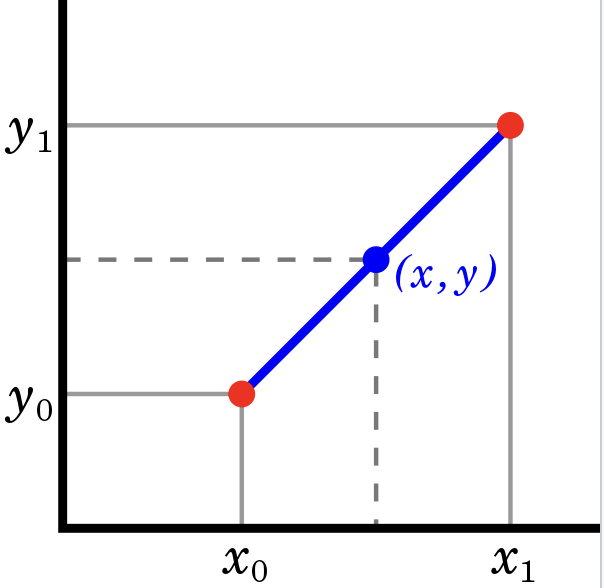

In [213]:
### Î™®Îì† ÏπºÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïπ¥Ïö¥Ìä∏Î°ú Î≥¥Í∏∞
for i in range(len(concat.columns)):
    print(concat.columns[i], concat[concat.columns[i]].nunique())


ÏãúÍµ∞Íµ¨ 339
Ï†ÑÏö©Î©¥Ï†Å 14670
Í≥ÑÏïΩÎÖÑÏõî 201
Ï∏µ 73
Í±¥Ï∂ïÎÖÑÎèÑ 60
ÎèÑÎ°úÎ™Ö 9245
target 14531
is_test 2
index_num 1128094
Íµ¨Î∂Ñ 36371
Íµ¨Î∂Ñdate 661122
Íµ¨Î∂Ñnum 36371


### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

## 4 . Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [214]:
'''
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 4))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()
'''

"\n# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.\nfig = plt.figure(figsize=(13, 4))\nmissing = concat.isnull().sum() / concat.shape[0]\nmissing = missing[missing > 0]\nmissing.sort_values(inplace=True)\nmissing.plot.bar(color='orange')\nplt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')\nplt.show()\n"

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [215]:
'''
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)
'''

'\n# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.\ncontinuous_columns = []\ncategorical_columns = []\n\nfor column in concat_select.columns:\n    if pd.api.types.is_numeric_dtype(concat_select[column]):\n        continuous_columns.append(column)\n    else:\n        categorical_columns.append(column)\n\nprint("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)\nprint("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)\n'

- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [216]:
'''
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)
'''

"\n# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ\nconcat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')\n\n# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)\nconcat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)\n"

In [217]:
# concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation(Î≥¥Í∞ÑÎ≤ï) Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

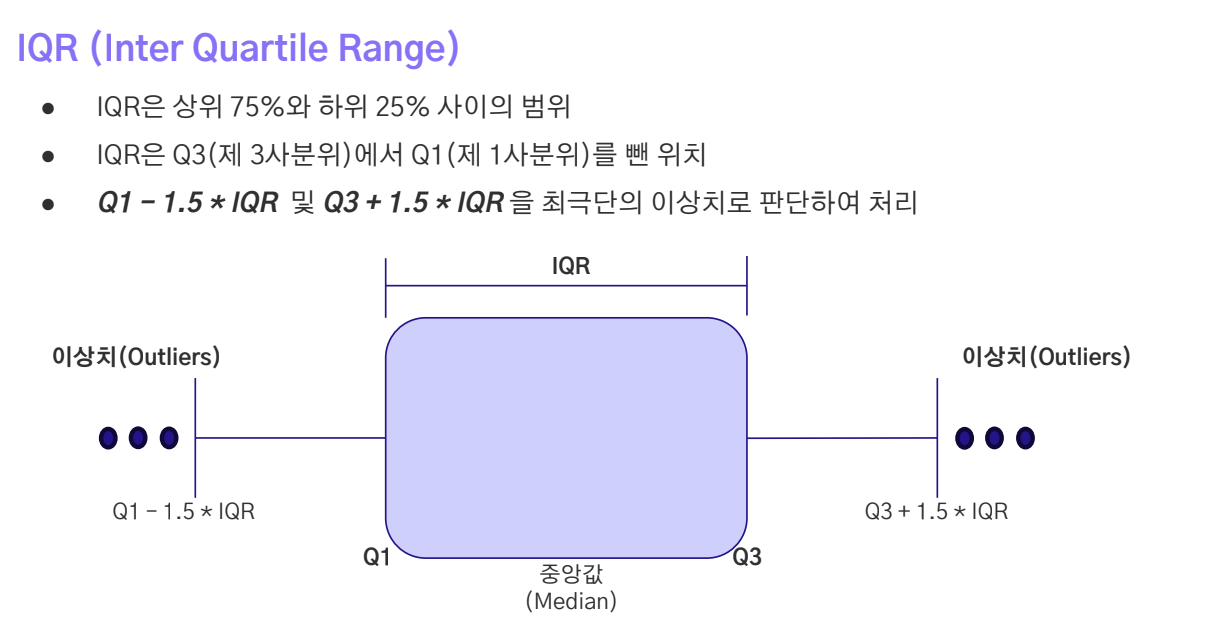

In [218]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat.shape)

(1128094, 12)


In [219]:
concat.describe()

Ï†ÑÏö©Î©¥Ï†Å          Í≥ÑÏïΩÎÖÑÏõî             Ï∏µ          Í±¥Ï∂ïÎÖÑÎèÑ        target  \
count  1.128094e+06  1.128094e+06  1.128094e+06  1.128094e+06  1.128094e+06   
mean   7.716028e+01  2.014829e+05  8.881412e+00  1.998791e+03  5.751489e+04   
std    2.936448e+01  4.237691e+02  5.989302e+00  9.358540e+00  4.653036e+04   
min    1.002000e+01  2.007010e+05 -4.000000e+00  1.961000e+03  0.000000e+00   
25%    5.965000e+01  2.011110e+05  4.000000e+00  1.992000e+03  3.000000e+04   
50%    8.187000e+01  2.015080e+05  8.000000e+00  2.000000e+03  4.450000e+04   
75%    8.496000e+01  2.018050e+05  1.200000e+01  2.005000e+03  6.950000e+04   
max    4.243200e+02  2.023090e+05  6.900000e+01  2.023000e+03  1.450000e+06   

            is_test     index_num         Íµ¨Î∂Ñnum  
count  1.128094e+06  1.128094e+06  1.128094e+06  
mean   8.219173e-03  5.640465e+05  1.754935e+04  
std    9.028635e-02  3.256528e+05  9.724563e+03  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.820232e+05  1.049700e+04  
50%    0.000000e+00  5.640465e+05  1.607400e+04  
75%    0.000000e+00  8.460698e+05  2.550800e+04  
max    1.000000e+00  1.128093e+06  3.637000e+04

In [220]:
concat[concat['Ï†ÑÏö©Î©¥Ï†Å'] > 135].count()

ÏãúÍµ∞Íµ¨          44127
Ï†ÑÏö©Î©¥Ï†Å         44127
Í≥ÑÏïΩÎÖÑÏõî         44127
Ï∏µ            44127
Í±¥Ï∂ïÎÖÑÎèÑ         44127
ÎèÑÎ°úÎ™Ö          44127
target       44127
is_test      44127
index_num    44127
Íµ¨Î∂Ñ           44127
Íµ¨Î∂Ñdate       44127
Íµ¨Î∂Ñnum        44127
dtype: int64

In [221]:
a = concat.Ï†ÑÏö©Î©¥Ï†Å.value_counts()

In [222]:
a = pd.DataFrame(a).reset_index()

In [223]:
a.describe()

Ï†ÑÏö©Î©¥Ï†Å         count
count  14670.000000  14670.000000
mean      94.880815     76.898023
std       53.532142    546.077378
min       10.020000      1.000000
25%       57.504975      3.000000
50%       84.619000     10.000000
75%      124.397500     33.000000
max      424.320000  20593.000000

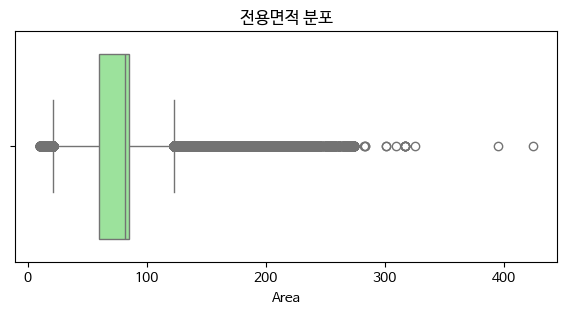

In [224]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat, x = 'Ï†ÑÏö©Î©¥Ï†Å', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [225]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [226]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat = remove_outliers_iqr(concat, 'Ï†ÑÏö©Î©¥Ï†Å')

In [227]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat.shape)

(1038846, 12)


In [228]:
concat['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

is_test
0    1029574
1       9272
Name: count, dtype: int64

In [229]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat['Íµ¨'] = concat['Íµ¨Î∂Ñ'].map(lambda x : x.split()[1])
concat['Îèô'] = concat['Íµ¨Î∂Ñ'].map(lambda x : x.split()[2])
#del concat['ÏãúÍµ∞Íµ¨']

concat['Í≥ÑÏïΩÎÖÑ'] = concat['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat['Í≥ÑÏïΩÏõî'] = concat['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
#del concat['Í≥ÑÏïΩÎÖÑÏõî']

In [230]:
len(concat.columns), concat.columns

(16,
 Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'target', 'is_test',
        'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî'],
       dtype='object'))

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [231]:
all = list(concat['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [232]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [233]:
len(concat.columns), concat.columns

(17,
 Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'target', 'is_test',
        'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä'],
       dtype='object'))

In [234]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038846 entries, 0 to 1128093
Data columns (total 17 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ÏãúÍµ∞Íµ¨        1038846 non-null  object 
 1   Ï†ÑÏö©Î©¥Ï†Å       1038846 non-null  float64
 2   Í≥ÑÏïΩÎÖÑÏõî       1038846 non-null  int64  
 3   Ï∏µ          1038846 non-null  int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ       1038846 non-null  int64  
 5   ÎèÑÎ°úÎ™Ö        1038846 non-null  object 
 6   target     1038846 non-null  int64  
 7   is_test    1038846 non-null  int64  
 8   index_num  1038846 non-null  int64  
 9   Íµ¨Î∂Ñ         1038846 non-null  object 
 10  Íµ¨Î∂Ñdate     1038846 non-null  object 
 11  Íµ¨Î∂Ñnum      1038846 non-null  int64  
 12  Íµ¨          1038846 non-null  object 
 13  Îèô          1038846 non-null  object 
 14  Í≥ÑÏïΩÎÖÑ        1038846 non-null  object 
 15  Í≥ÑÏïΩÏõî        1038846 non-null  object 
 16  Í∞ïÎÇ®Ïó¨Î∂Ä       1038846 non-null  int64  
dtypes: float64(1), 

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [235]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.038846e+06
mean     1.998583e+03
std      9.132471e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.009000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [236]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2009 else 0)

In [237]:
concat.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö  target  is_test  index_num  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  79.97  201712  3  1987  Ïñ∏Ï£ºÎ°ú 3  124000        0          0   

                                 Íµ¨Î∂Ñ                                   Íµ¨Î∂Ñdate  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 658-1 Í∞úÌè¨6Ï∞®Ïö∞ÏÑ± 79.97  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 658-1 Í∞úÌè¨6Ï∞®Ïö∞ÏÑ± 79.97 201712   

   Íµ¨Î∂Ñnum    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  
0    190  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2017  12     1     0

- ÏúÑ Îëê ÏÇ¨Ìï≠ Ïô∏ÏóêÎèÑ Ïô∏Î∂Ä Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÍ±∞ÎÇò, EDAÎ•º ÌÜµÌï¥ Îçî ÎßéÏùÄ Î≥ÄÏàòÎ•º Ï†úÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

### ÏûëÏÑ±Ìïú Í≤É.

#### ÏïÑÌååÌä∏Î≥Ñ Íµ¨Î∂Ñ ÎßåÎì§Í∏∞

#### ÏïÑÌååÌä∏Î≥ÑÏóê ÌèâÏàòÎ•º 'Íµ¨Î∂Ñ' Ïª¨Îüº Ï∂îÍ∞ÄÌïòÍ∏∞

##### ÏïÑÌååÌä∏ Í±∞ÎûòÎüâ ÌôïÏù∏

#### <font color=Tomato> Ìï¥Î≥¥Î†§Îäî Í≤É 1
- ÏïÑÌååÌä∏Î≥Ñ ÏπòÏàòÎ≥ÑÎ°ú Ïó∞ Ïõî Îã®ÏúÑÎ°ú ÌèâÍ∑†Í∞íÏùÑ Í∞ÄÏßÑ Í∑∏ÎûòÌîÑ ÎßåÎì§Í∏∞
- ÏïÑÌååÌä∏Î≥Ñ ÏõîÎ≥Ñ ÏãúÍ≥ÑÏó¥ Í≤∞Ï∏°Ïπò Ï±ÑÏõåÎÑ£Í∏∞
- ÏãúÍ≥ÑÏó¥ Í¥ÄÎ†® Ïù¥ÎèôÌèâÍ∑†ÏÑ†Í≥º Í∞ÄÏ§ëÏù¥ÎèôÌèâÍ∑†ÏÑ†, ÎàÑÏ†Å Î†àÍ∑∏ÎßåÎì§Í∏∞
- ÌÉÄÏûÑ Ïä§ÌîåÎ¶øÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï™ºÍ∞úÎ°ú Î™®Îç∏ ÌïôÏäµÏãúÌÇ§Í∏∞
- ÏÉòÌîåÎßÅ Í≤∞Í≥º ÌôïÏù∏ÌïòÍ∏∞
</font>

#### <font color=Tomato> Ìï¥Î≥¥Î†§Îäî Í≤É 2
- <font color=Tomato>ÏïÑÌååÌä∏Î≥Ñ ÏπòÏàòÎ≥ÑÎ°ú Ïó∞ Ïõî Îã®ÏúÑÎ•º Í∑∏ÎûòÌîÑÎ°ú Ï†ê Ï∞çÏñ¥ÏÑú Î∂ÑÌè¨ Î≥¥Í∏∞
- Ïù¥ ÎÇ¥Ïö©Ïóê ÎåÄÌï¥ÏÑú ÏãúÍ≥ÑÏó¥Î°ú ÎêúÍ±∞ Í∑∏ÎÉ• Î∞îÎ°ú ÏòàÏ∏°ÏãúÏºúÎ≥¥Í∏∞.

<font color=Tomato> ÏúÑ ÎëêÍ∞ÄÏßÄ ÎÇ¥Ïö©Ïóê ÎåÄÌï¥ÏÑú Í≤∞Í≥ºÏπòÏóê ÎåÄÌïú ÌèâÍ∞ÄÌï¥Î≥¥Í∏∞



### ÏÉàÎ°úÏö¥ Î≥ÄÏàò ÎßåÎì§Í∏∞

[ ] Ïù¥ÎèôÌèâÍ∑†, Í∞ÄÏ§ëÏù¥ÎèôÌèâÍ∑†

[ ] ÏÑúÏö∏ ÌèâÍ∑†, Íµ¨ ÌèâÍ∑†, Îèô ÌèâÍ∑† Ï∂îÍ∞Ä






In [238]:
len(concat)

1038846

In [239]:
### ÏïÑÌååÌä∏Î≥Ñ Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ Í±∞ÎûòÎüâ

# 2500
A = [0]
i = 0
while i < 2200:
    i += 100
    A.append(i)

tmp = concat['Íµ¨Î∂Ñ'].value_counts().reset_index()
for i in A :
    tmp1 = tmp[tmp['count'] > i]
    #print(tmp1)
    print('Í≥ÑÏïΩÍ±¥Ïàò ', i, 'Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ :', tmp1['count'].sum(), "Í±¥")


    ### Í±∞Îûò Í±¥ÏàòÎ≥Ñ ÌèâÎãπ ÌèâÍ∑† Í±∞ÎûòÍ∞ÄÍ≤©ÏùÄ?

Í≥ÑÏïΩÍ±¥Ïàò  0 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 1038846 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  100 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 650791 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  200 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 437565 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  300 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 301903 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  400 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 221179 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  500 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 159797 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  600 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 114812 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  700 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 77299 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  800 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 54011 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  900 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 43156 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1000 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 36713 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1100 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 27442 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1200 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 22885 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1300 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 16674 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1400 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 13929 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1500 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 12503 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò

In [240]:
A = 50
B = 400

tmp = concat['Íµ¨Î∂Ñdate'].value_counts().reset_index()
print(tmp)
print("-----------------------------------------------------------", A, "--------------------------")
tmp_50 = tmp[tmp['count'] > 50]
print(tmp_50)
print("-----------------------------------------------------------", B, "--------------------------")
tmp_400 = tmp[tmp['count'] > B]
print(tmp_400)

                                             Íµ¨Î∂Ñdate  count
0           ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÎûëÍµ¨ Ïã†ÎÇ¥Îèô 816 Ïã†ÎÇ¥Ïö∞ÎîîÏïà1Îã®ÏßÄ 84.65 201408     71
1             ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨Îèô 20-43 Î∞òÌè¨ÏûêÏù¥ 59.98 200905     56
2                ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200803     56
3        ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨ ÎÇ¥Î∞úÏÇ∞Îèô 753 ÎßàÍ≥°ÏàòÎ™ÖÏÇ∞ÌååÌÅ¨4Îã®ÏßÄ 59.84 200803     53
4                ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 201808     50
...                                             ...    ...
595853      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†ÏõîÎèô 1059 ÏÉÅÏßÑÏßÄÏò§Î≤®Î¶¨ 105.43 201810      1
595854        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†ÏõîÎèô 447-3 ÏÉÅÏïÑÏïÑÎ¶Ñ 67.74 201909      1
595855        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†ÏõîÎèô 447-3 ÏÉÅÏïÑÏïÑÎ¶Ñ 84.35 201903      1
595856  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†ÏõîÎèô 519-25 ÏÇºÏ¢ÖÎ†àÏù¥Îπå102Îèô 78.31 201906      1
595857      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÎûëÍµ¨ Ïã†ÎÇ¥Îèô 816 Ïã†ÎÇ¥Ï

### 1ÎÖÑÏ†ÑÍπåÏßÄ Í∞ÄÍ≤© Îèô ÌèâÍ∑† ÌèâÎã® Îã®Í∞ÄÎ°ú Ïú†Ï∂îÌï¥ÏÑú ÏßëÏñ¥ÎÑ£Îäî ÏΩîÎìú ÎßåÎì§Í∏∞

In [245]:
len(concat.columns),concat.columns

(18,
 Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'target', 'is_test',
        'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä',
        'Ïã†Ï∂ïÏó¨Î∂Ä'],
       dtype='object'))

In [246]:
base = concat.copy()

In [243]:
# base.drop(columns=['index_num', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum'], inplace=True)

In [244]:
Î∏åÎ†àÏù¥ÌÅ¨

NameError: name 'Î∏åÎ†àÏù¥ÌÅ¨' is not defined

In [ ]:
# base_mean = pd.read_csv('/content/drive/MyDrive/AILAB_Advance/base_mean.csv')
# base = pd.read_csv('/content/drive/MyDrive/AILAB_Advance/base.csv')


In [ ]:
# base.info()
# base2 =
base.iloc[0][0]

In [ ]:
base.isnull().sum()

In [ ]:
tmp = base[['Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Í≥ÑÏïΩÎÖÑÏõî', 'mean']]
tmp[tmp['Íµ¨Î∂Ñ'] == 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 1164-12 ÏÉàÎ°¨ 73.5']


In [ ]:
### ÌÖåÏä§Ìä∏

da = tmp[tmp['Íµ¨Î∂Ñ'] == 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 1164-12 ÏÉàÎ°¨ 73.5']
df = pd.DataFrame(da)

# 202007Î∂ÄÌÑ∞ 202207ÍπåÏßÄÏùò Í≥ÑÏïΩÎÖÑÏõî ÌïÑÌÑ∞ÎßÅ
filtered_df = df[(df['Í≥ÑÏïΩÎÖÑÏõî'] >= 202007) & (df['Í≥ÑÏïΩÎÖÑÏõî'] <= 202207)]

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot_table = filtered_df.pivot_table(index='Íµ¨Î∂Ñ', columns='Í≥ÑÏïΩÎÖÑÏõî', values='mean')

# Í≤∞Í≥º Ï∂úÎ†•
print("Pivoted Table:")
print(pivot_table)

In [ ]:
tmp[tmp['mean'] == 0]


In [ ]:
# ÌèâÍ∑† 0Í∞íÏù¥ ÏûàÎäî ÏïÑÌååÌä∏ ÎÇ¥Ïö© Î≥¥Í∏∞
tmp[tmp['Íµ¨Î∂Ñ'] == 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 12 ÏÇºÏùµÎåÄÏ≤≠ 39.53']

In [ ]:
# ÌèâÍ∑† 0Í∞íÏù¥ ÏûàÎäî ÏïÑÌååÌä∏ ÎÇ¥Ïö© Î≥¥Í∏∞
base[base['Íµ¨Î∂Ñ'] == 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 12 ÏÇºÏùµÎåÄÏ≤≠ 39.53']

In [ ]:
pivoted = tmp.pivot(index='Íµ¨Î∂Ñ', columns='Í≥ÑÏïΩÎÖÑÏõî', values='mean')

In [ ]:
pivoted

In [ ]:
# train_pivoted = concat.pivot(index='Íµ¨Î∂Ñ', columns='Í≥ÑÏïΩÎÖÑÏõî', values='target')

[    ] test Í≥ÑÏïΩ Î∂ÑÌè¨ ÏïåÏïÑÎ≥¥Í∏∞

In [ ]:
data.info()

In [ ]:
# Îèô ÏßÄÏó≠Î≥Ñ
dong_grouped = concat.groupby('Îèô').agg({
    'Ï†ÑÏö©Î©¥Ï†Å': 'sum',
    'target': ['sum', 'mean']
})

# Ïª¨Îüº Ïù¥Î¶Ñ Ï†ïÎ¶¨
dong_grouped.columns = ['Ï†ÑÏö©Î©¥Ï†Å_Ìï©', 'ÌÉÄÍ≤ü_Ìï©(Îèô)', 'ÌÉÄÍ≤ü_ÌèâÍ∑†(Îèô)']

In [ ]:
dong_grouped['ÌÉÄÍ≤ü_Î©¥Ï†ÅÎãπ_ÎπÑÏú®(Îèô)'] = dong_grouped['ÌÉÄÍ≤ü_Ìï©(Îèô)'] / dong_grouped['Ï†ÑÏö©Î©¥Ï†Å_Ìï©']

In [ ]:
dong_grouped.head()

In [ ]:
dong_grouped.reset_index(inplace=True)

In [ ]:
merge_d = dong_grouped[['Îèô','ÌÉÄÍ≤ü_ÌèâÍ∑†(Îèô)','ÌÉÄÍ≤ü_Î©¥Ï†ÅÎãπ_ÎπÑÏú®(Îèô)']]
concat = pd.merge(concat, merge_d, on='Îèô', how='left')

In [ ]:
# ÏïÑÌååÌä∏ Î©¥Ï†ÅÎãπ ÌèâÍ∑†Í∞ÄÍ≤© ÏµúÍ∑º 3ÎÖÑ

In [ ]:
concat.info()

In [ ]:
### Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞í, ÏßÄÏó≠ ÌèâÍ∑†Í∞í ÎßåÎì§Í∏∞
# df_all['national_avg'] = df_all.groupby(['year','month'])['microbusiness_density'].transform('mean')
# df_all['state_avg'] = df_all.groupby(['state','year','month'])['microbusiness_density'].transform('mean')

### ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞ - Íµ¨Î∂Ñ(ÏïÑÌååÌä∏+Î©¥Ï†Å)Î≥Ñ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

In [341]:
concat.columns

Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'target', 'is_test',
       'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä',
       'Ïã†Ï∂ïÏó¨Î∂Ä'],
      dtype='object')

In [342]:
tran_count = concat['Íµ¨Î∂Ñ'].value_counts()
tran_count = pd.DataFrame(tran_count).reset_index()
tran_count

Íµ¨Î∂Ñ  count
0             ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   2168
1             ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ Ï§ëÍ≥ÑÎèô 369 Ï£ºÍ≥µ2 44.52   1949
2              ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Ïû†Ïã§Îèô 22 Î¶¨ÏÑºÏ∏† 84.99   1755
3            ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Ï∞ΩÎèô 38 Ï£ºÍ≥µ17Îã®ÏßÄ 36.16   1722
4      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎ∂ÅÍµ¨ ÎØ∏ÏïÑÎèô 1353 ÏóêÏä§ÏºÄÏù¥Î∂ÅÌïúÏÇ∞ÏãúÌã∞ 59.98   1719
...                                   ...    ...
30907      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÏñëÌèâÎèô4Í∞Ä 196 ÏàòÏÑ±ÏòàÏà† 82.5      1
30908     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÏñëÌèâÎèô4Í∞Ä 160-2 ÏïΩÏÇ∞ 34.58      1
30909     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Î∞©ÌïôÎèô 690-3 Î∂ÄÏòÅÌå∞Î¶¨Ïä§ 79.05      1
30910  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Í∞ÄÎùΩÎèô 77-7 ÏÜ°ÌååNsuite 112.57      1
30911        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Ìï©Ï†ïÎèô 390-5 ÎåÄÏö¥ 58.16      1

[30912 rows x 2 columns]

In [343]:
### ÏÉòÌîåÎßÅÏö© Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
#
NUM = 0
sample = concat.loc[ concat['Íµ¨Î∂Ñ'] == tran_count.iloc[NUM][0] ]

title = tran_count.iloc[NUM][0]
### ÎÇ¥Ïö©ÌôïÏù∏
print(title, "Ïùò ", len(sample), 'Í±¥Ïùò Îß§Îß§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù\n')
sample.info()

ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 Ïùò  2168 Í±¥Ïùò Îß§Îß§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

<class 'pandas.core.frame.DataFrame'>
Index: 2168 entries, 39557 to 1122560
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ÏãúÍµ∞Íµ¨        2168 non-null   object 
 1   Ï†ÑÏö©Î©¥Ï†Å       2168 non-null   float64
 2   Í≥ÑÏïΩÎÖÑÏõî       2168 non-null   int64  
 3   Ï∏µ          2168 non-null   int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ       2168 non-null   int64  
 5   ÎèÑÎ°úÎ™Ö        2168 non-null   object 
 6   target     2168 non-null   int64  
 7   is_test    2168 non-null   int64  
 8   index_num  2168 non-null   int64  
 9   Íµ¨Î∂Ñ         2168 non-null   object 
 10  Íµ¨Î∂Ñdate     2168 non-null   object 
 11  Íµ¨Î∂Ñnum      2168 non-null   int64  
 12  Íµ¨          2168 non-null   object 
 13  Îèô          2168 non-null   object 
 14  Í≥ÑÏïΩÎÖÑ        2168 non-null   object 
 15  Í≥ÑÏïΩÏõî        2168 non-null   object 
 16  Í∞ïÎ

In [344]:
### Í≥ÑÏïΩÎÖÑÏõîÏùÑ intÍ∞íÏúºÎ°ú Î≥ÄÍ≤Ω, ÏãúÍ≥ÑÏó¥ Ï†ÑÌôòÏùÑ ÏúÑÌï¥
sample['Í≥ÑÏïΩÎÖÑÏõî'] = sample['Í≥ÑÏïΩÎÖÑÏõî'].astype(int)

### Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨: 'Íµ¨Î∂Ñdate'Î°ú 'Í≥ÑÏïΩÎÖÑÏõî' ÏàúÏÑúÎ°ú Ï†ïÎ†¨
final_data = sample.sort_values(by=['Íµ¨Î∂Ñdate'])

### Ï†ïÎ†¨ Î≥ÄÍ≤ΩÎÇ¥Ïö© ÌôïÏù∏
final_data[['Íµ¨Î∂Ñdate', 'Í≥ÑÏïΩÎÖÑÏõî', 'target']].head(10)

Íµ¨Î∂Ñdate    Í≥ÑÏïΩÎÖÑÏõî  target
1096154  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   26000
1096155  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   26600
1096156  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   27800
1096157  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   23000
1096158  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   27000
1096159  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   27700
1096160  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   26500
1096161  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   30000
1096162  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   28500
1096167  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   25000

In [345]:
# IQR Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌïòÎäî Ìï®Ïàò
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


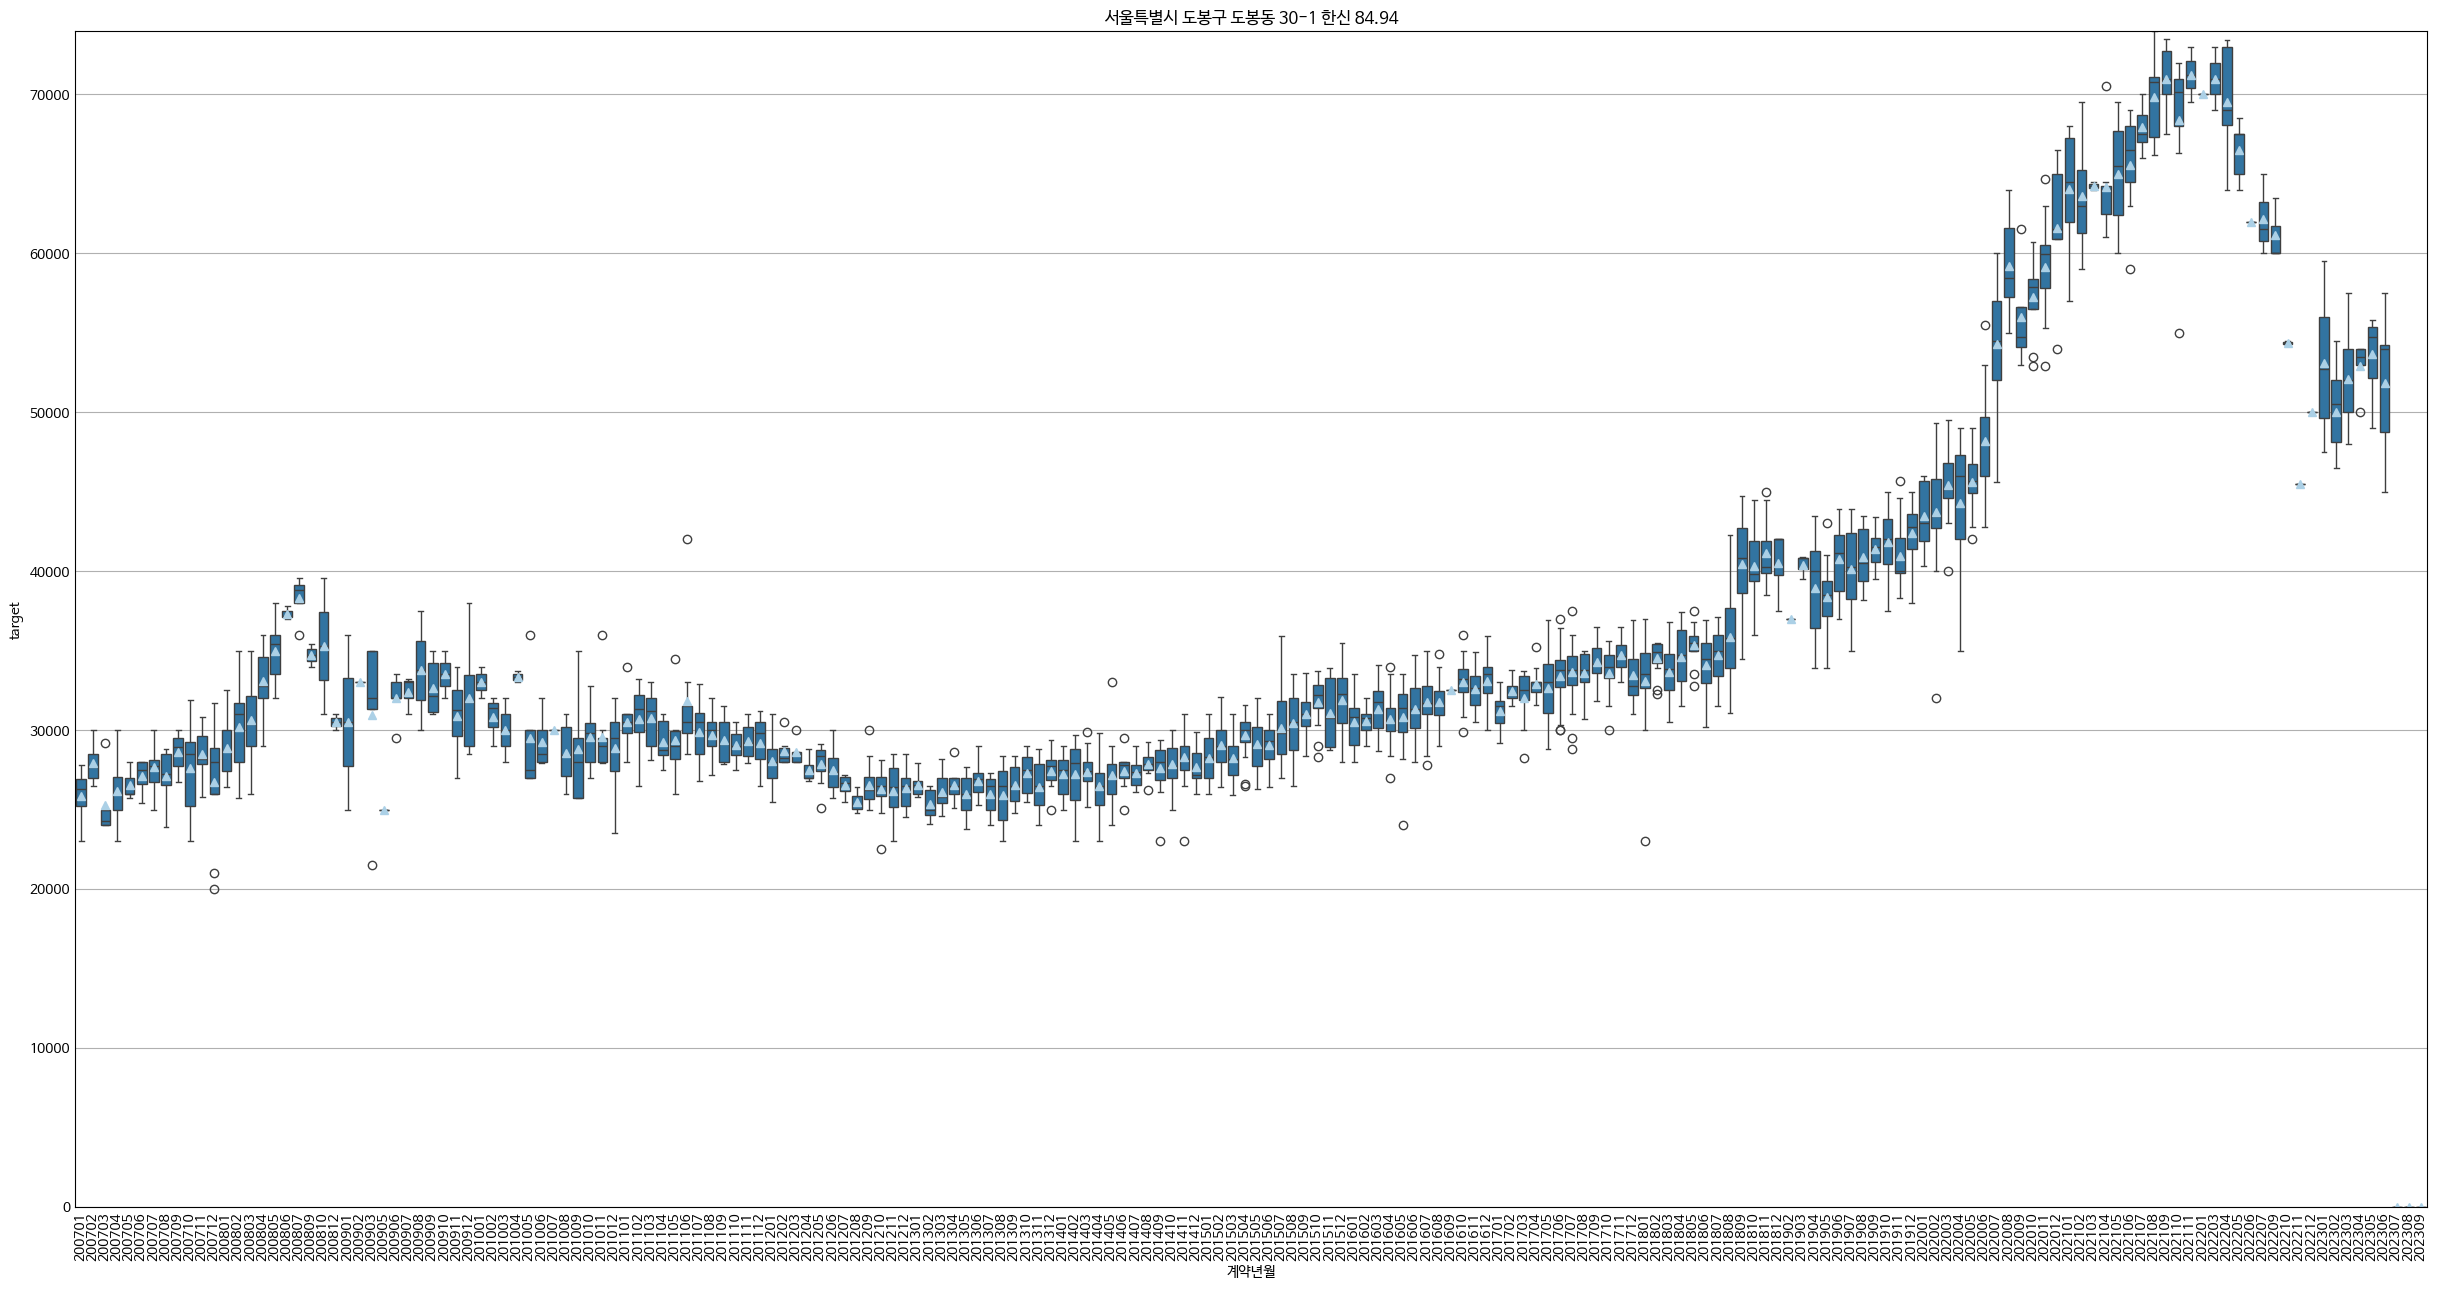

In [346]:
### Ïù¥ÏÉÅÏπò Ï†úÍ±∞Ï†Ñ ÌôïÏù∏ Î∞ïÏä§Í∑∏ÎûòÌîÑ
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize=(24, 12))
plt.title(title)

plt.ylim(final_data['target'].min(),final_data['target'].max())
plt.xticks(rotation=90)
sns.boxplot(x="Í≥ÑÏïΩÎÖÑÏõî", y="target", data=final_data, showmeans=True)

plt.show()

In [347]:
### Í∞Å Í≥ÑÏïΩÎÖÑÏõîÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ ÌèâÍ∑† Í≥ÑÏÇ∞
data_cleaned = final_data.groupby('Íµ¨Î∂Ñdate').apply(lambda x: remove_outliers(x, 'target'))
data_cleaned = data_cleaned.reset_index(drop=True)

In [348]:
### n Í∞ú Ïù¥ÏÉÅÏπòÍ∞Ä Ï†úÍ±∞Îê®
len(final_data), len(data_cleaned), len(final_data)-len(data_cleaned)

(2168, 2100, 68)

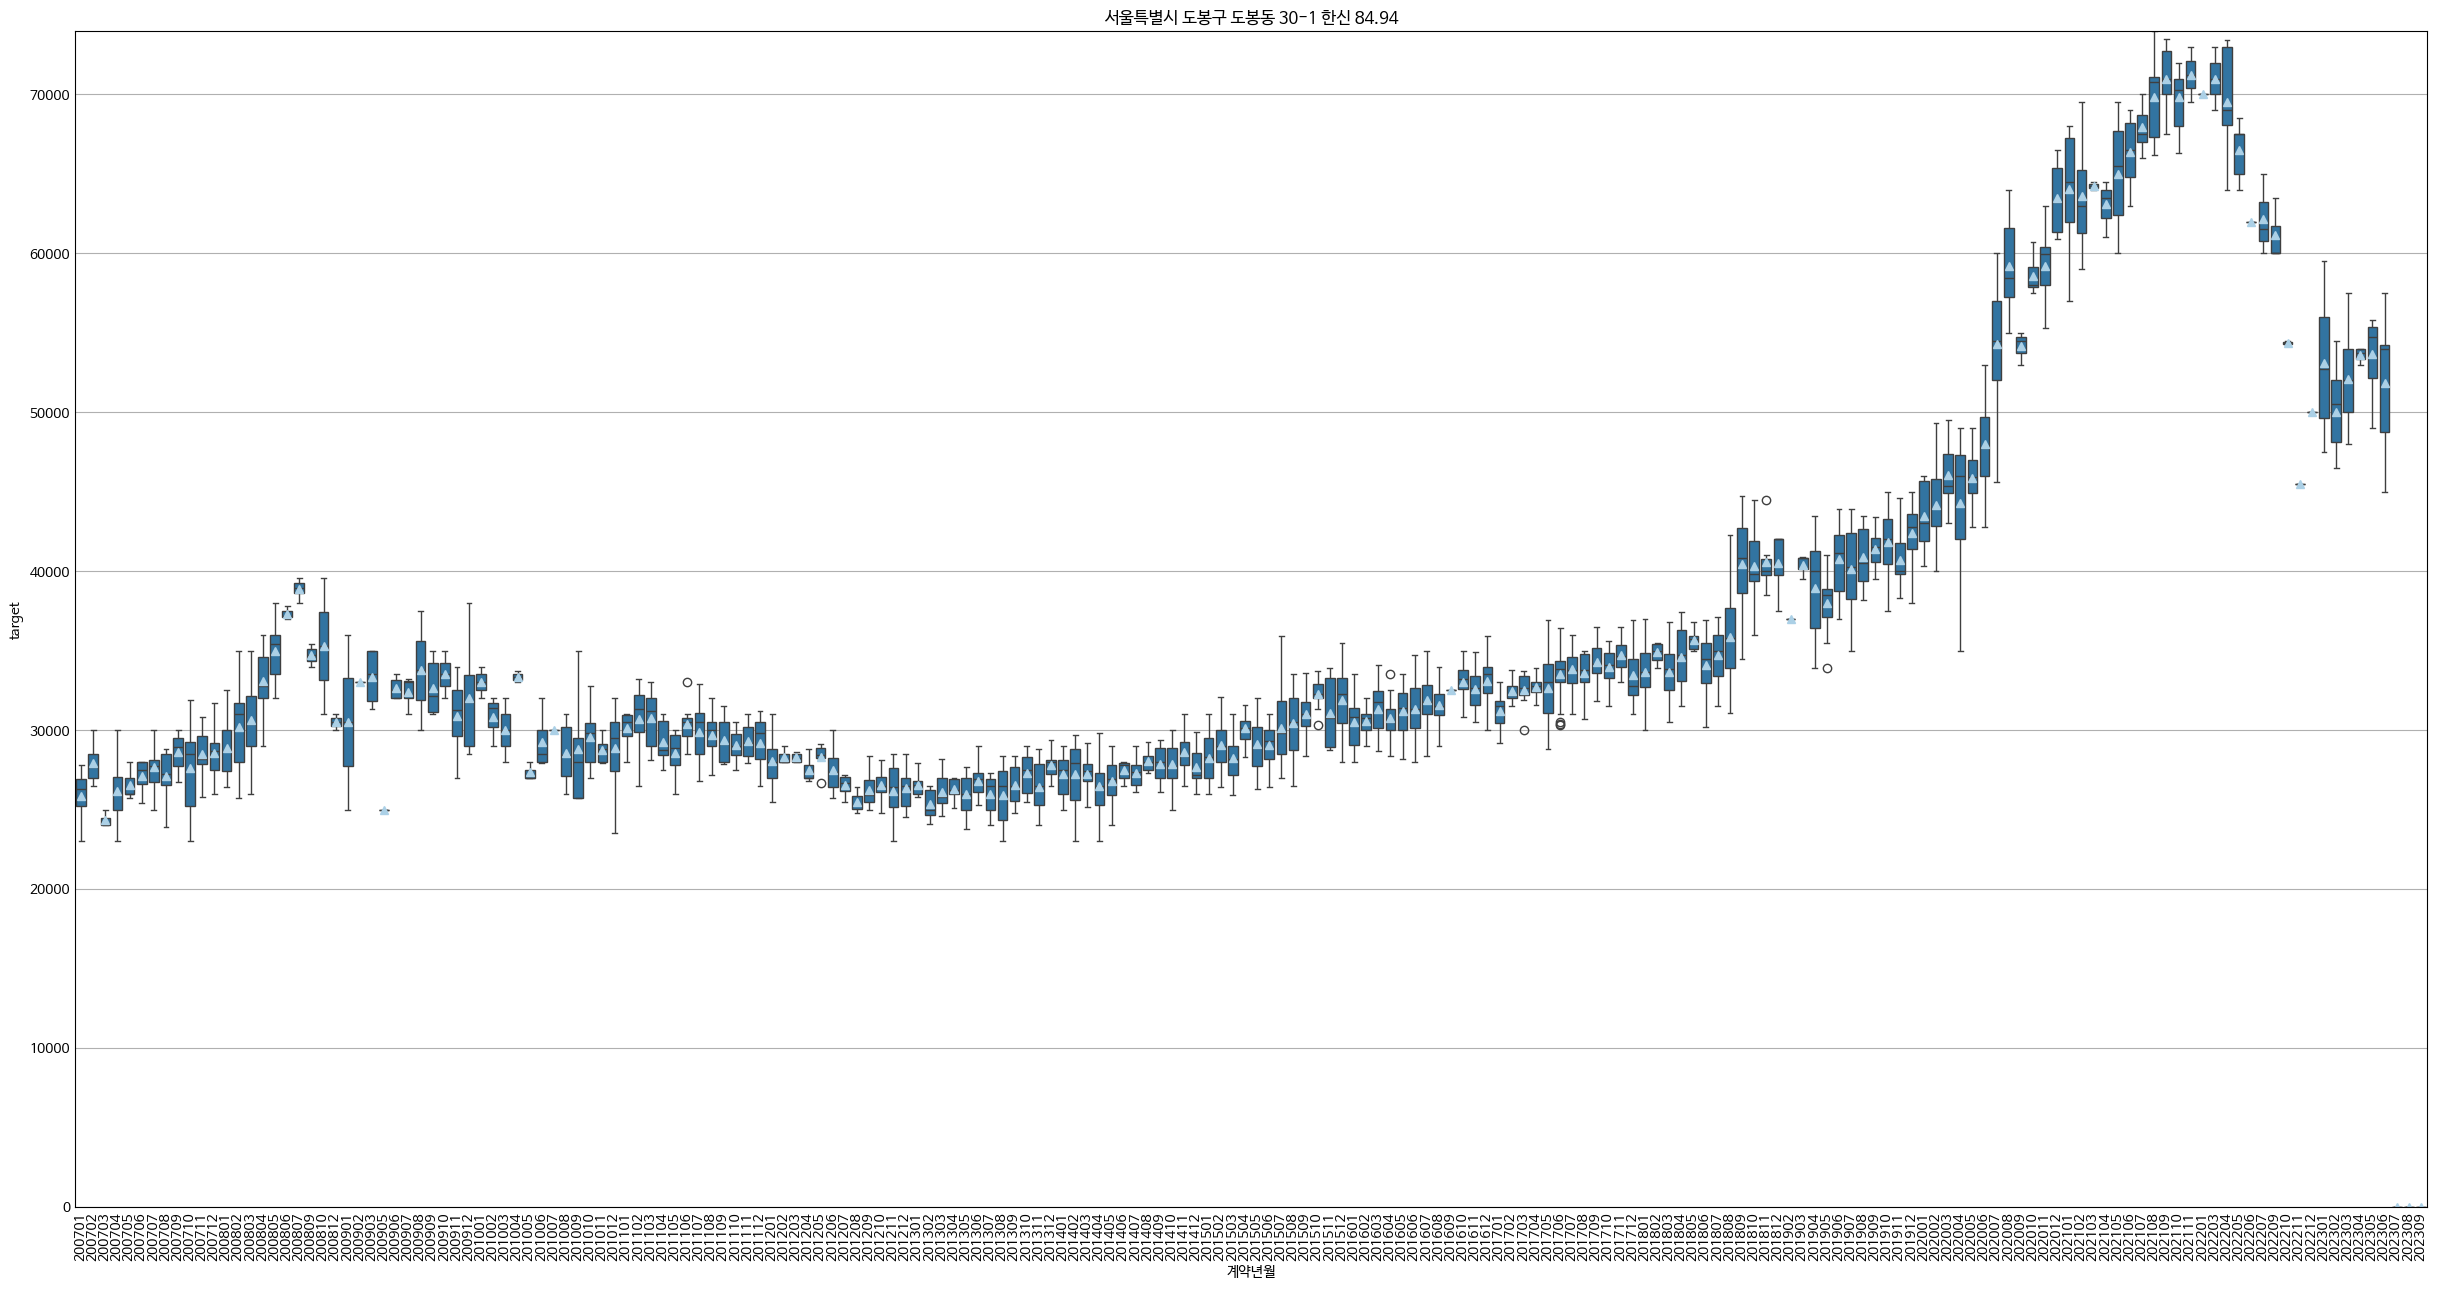

In [349]:
### Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌõÑ ÌôïÏù∏ Î∞ïÏä§Í∑∏ÎûòÌîÑ
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize=(24, 12))
plt.title(title)

plt.ylim(final_data['target'].min(),final_data['target'].max())
plt.xticks(rotation=90)
sns.boxplot(x="Í≥ÑÏïΩÎÖÑÏõî", y="target", data=data_cleaned, showmeans=True)

plt.show()

In [350]:
### Î≥ÄÍ≤ΩÎÇ¥Ïö© ÌôïÏù∏
data_cleaned[['Íµ¨Î∂Ñdate', 'Í≥ÑÏïΩÎÖÑÏõî', 'target']].head(10)

Íµ¨Î∂Ñdate    Í≥ÑÏïΩÎÖÑÏõî  target
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   26000
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   26600
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   27800
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  200701   23000
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   27000
5  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   27700
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   26500
7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   30000
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  200702   28500
9  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  200703   25000

In [351]:
### Í≥ÑÏïΩÎÖÑÏõî Î≥Ñ targetÏùò ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
mean_target = data_cleaned.groupby('Íµ¨Î∂Ñdate')['target'].mean().reset_index()
mean_target.columns = ['Íµ¨Î∂Ñdate', 'mean']

mean_target.head()

Íµ¨Î∂Ñdate          mean
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.000000
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.000000
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  24325.000000
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  26157.142857
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  26550.000000

In [352]:
### Ïù¥ÎèôÌèâÍ∑†Í≥º ÏßÄÏàòÏù¥ÎèôÌèâÍ∑†ÏùÑ Íµ¨ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
### SMAÏôÄ EMAÎäî Î™®Îëê ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Ï∂îÏÑ∏ ÏßÄÌëúÏûÖÎãàÎã§. SMAÎäî Î™®Îì† Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê ÎèôÏùºÌïú Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÎäî Î∞òÎ©¥, EMAÎäî ÏµúÍ∑º Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê Îçî ÎßéÏùÄ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.

def moving_average(df,i, n):
    MA = pd.Series(df[i].rolling(n, min_periods=n).mean(), name = 'MA_' + str(n))
    df = df.join(MA)
    return df

def weighted_moving_average(df,i, n):
    EMA = pd.Series(df[i].ewm(span=n, adjust=False, min_periods=n).mean(), name = 'EMA_' + str(n))
    df = df.join(EMA)
    return df

In [353]:
### Î≥ÄÏàòÎ•º ÏÉùÏÑ±
df_all = mean_target

# ÏãúÍ∞Ñ ÏãúÍ≥ÑÏó¥ Í∏∞Î∞ò Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
# Ïù¥Îèô ÌèâÍ∑†(Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
df_all = moving_average(df_all, 'mean', 3)
df_all = moving_average(df_all, 'mean', 6)

# ÏßÄÏàò Ïù¥Îèô ÌèâÍ∑†(Exponential Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
df_all = weighted_moving_average(df_all, 'mean', 3)
df_all = weighted_moving_average(df_all, 'mean', 6)

In [354]:
### ÏÉùÏÑ±Î≥ÄÏàò ÌôïÏù∏
df_all[['Íµ¨Î∂Ñdate','mean', 'MA_3', 'MA_6', 'EMA_3','EMA_6']].head(10)

Íµ¨Î∂Ñdate          mean          MA_3  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.000000           NaN   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.000000           NaN   
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  24325.000000  26038.333333   
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  26157.142857  26140.714286   
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  26550.000000  25677.380952   
5  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200706  27100.000000  26602.380952   
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200707  27665.625000  27105.208333   
7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200708  27112.500000  27292.708333   
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200709  28608.333333  27795.486111   
9  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200710  27595.454545  27772.095960   

           MA_6         EMA_3         EMA_6  
0           NaN           NaN           NaN  
1           NaN           NaN           NaN  
2           NaN  25610.000000           NaN  
3           NaN  25883.571429           NaN  
4           NaN  26216.785714           NaN  
5  26320.357143  26658.392857  26391.426191  
6  26622.961310  27162.008929  26755.482994  
7  26485.044643  27137.254464  26857.487853  
8  27198.933532  27872.793899  27357.729419  
9  27438.652146  27734.124222  27425.650883

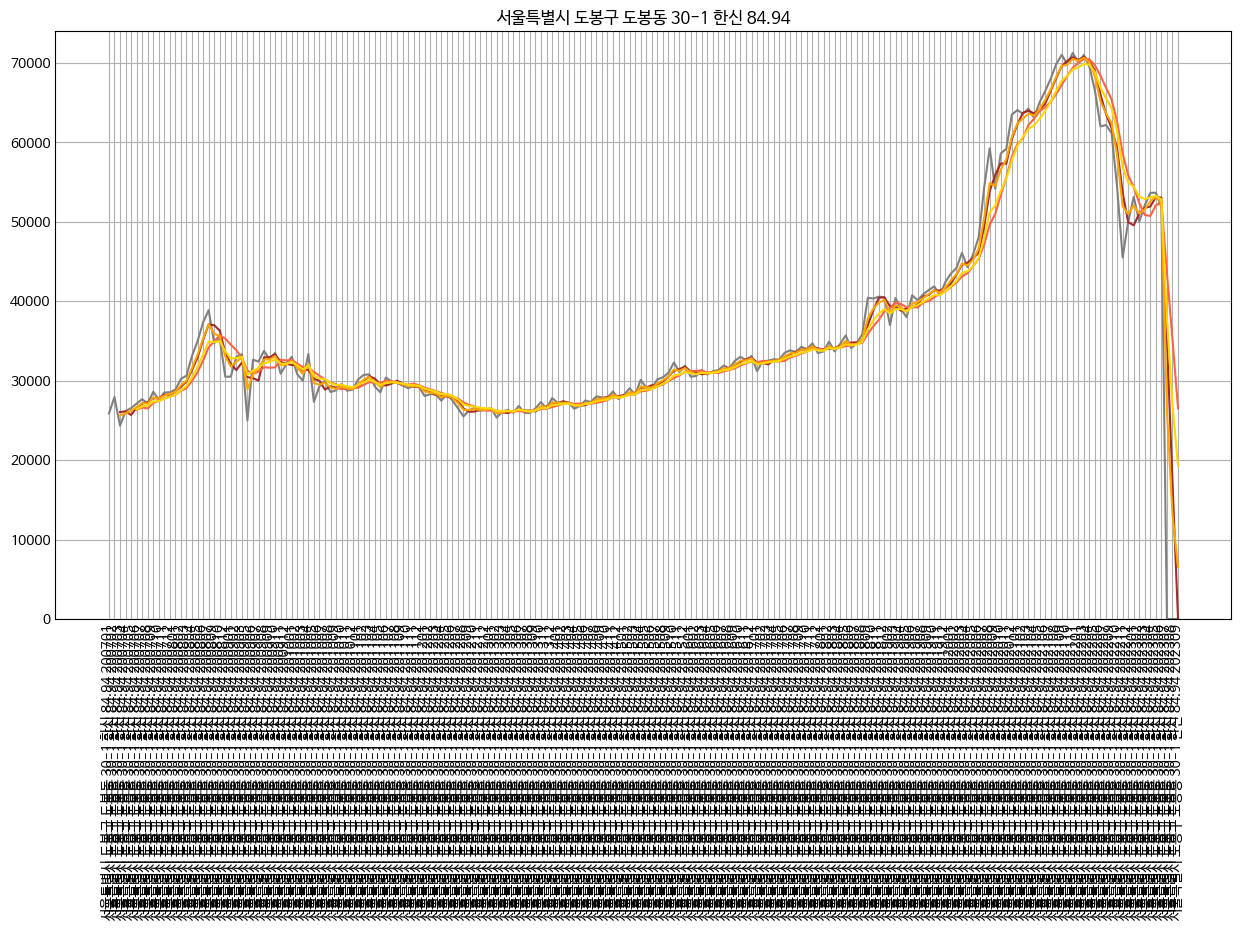

In [355]:
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize=(12, 6))
plt.title(title)

plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['mean'], color='gray')
plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['MA_3'], color='brown')
plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['MA_6'], color='tomato')
plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['EMA_3'], color='orange')
plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['EMA_6'], color='gold')

plt.ylim(final_data['target'].min(),final_data['target'].max())
plt.xticks(rotation=90)


plt.show()

In [356]:
### Î≥ÄÌôîÏú® Ï∂îÍ∞Ä
# add 'pct_change_before' variable. This variable shows that how the density changed previous month.
df_all['pct_change_before'] = df_all['mean'].pct_change().shift(1)

In [357]:
df_all

Íµ¨Î∂Ñdate          mean          MA_3  \
0    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.000000           NaN   
1    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.000000           NaN   
2    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  24325.000000  26038.333333   
3    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  26157.142857  26140.714286   
4    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  26550.000000  25677.380952   
..                                  ...           ...           ...   
189  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202305  53650.000000  53119.444444   
190  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202306  51812.500000  53029.166667   
191  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202307      0.000000  35154.166667   
192  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202308      0.000000  17270.833333   
193  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 202309      0.000000      0.000000   

             MA_6         EMA_3         EMA_6  pct_change_before  
0             NaN           NaN           NaN                NaN  
1             NaN           NaN           NaN                NaN  
2             NaN  25610.000000           NaN           0.080851  
3             NaN  25883.571429           NaN          -0.129384  
4             NaN  26216.785714           NaN           0.075319  
..            ...           ...           ...                ...  
189  52085.000000  53121.302372  53236.596257           0.029600  
190  52387.083333  52466.901186  52829.711612           0.000466  
191  43532.916667  26233.450593  37735.508294          -0.034250  
192  35195.138889  13116.725297  26953.934496          -1.000000  
193  26514.583333   6558.362648  19252.810354                NaN  

[194 rows x 7 columns]

In [358]:
### Î†àÍ∑∏Í∞í Ï∂îÍ∞Ä

# gnerate lag date

def lag_feature(df, value):
    for lag in range(1, value):
        df[f'lag_mean_{lag}'] = df['mean'].shift(lag)
        df[f'lag_mean_{lag}'] = df[f'lag_mean_{lag}'].bfill()

    return df

df_all = lag_feature(df_all, 6)


In [359]:
# Í≤∞Í≥º ÌôïÏù∏
df_all.head()

Íµ¨Î∂Ñdate          mean          MA_3  MA_6  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200701  25850.000000           NaN   NaN   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200702  27940.000000           NaN   NaN   
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200703  24325.000000  26038.333333   NaN   
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200704  26157.142857  26140.714286   NaN   
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94 200705  26550.000000  25677.380952   NaN   

          EMA_3  EMA_6  pct_change_before    lag_mean_1  lag_mean_2  \
0           NaN    NaN                NaN  25850.000000     25850.0   
1           NaN    NaN                NaN  25850.000000     25850.0   
2  25610.000000    NaN           0.080851  27940.000000     25850.0   
3  25883.571429    NaN          -0.129384  24325.000000     27940.0   
4  26216.785714    NaN           0.075319  26157.142857     24325.0   

   lag_mean_3  lag_mean_4  lag_mean_5  
0     25850.0     25850.0     25850.0  
1     25850.0     25850.0     25850.0  
2     25850.0     25850.0     25850.0  
3     25850.0     25850.0     25850.0  
4     27940.0     25850.0     25850.0

In [360]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2168 entries, 1096154 to 1122560
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ÏãúÍµ∞Íµ¨        2168 non-null   object 
 1   Ï†ÑÏö©Î©¥Ï†Å       2168 non-null   float64
 2   Í≥ÑÏïΩÎÖÑÏõî       2168 non-null   int64  
 3   Ï∏µ          2168 non-null   int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ       2168 non-null   int64  
 5   ÎèÑÎ°úÎ™Ö        2168 non-null   object 
 6   target     2168 non-null   int64  
 7   is_test    2168 non-null   int64  
 8   index_num  2168 non-null   int64  
 9   Íµ¨Î∂Ñ         2168 non-null   object 
 10  Íµ¨Î∂Ñdate     2168 non-null   object 
 11  Íµ¨Î∂Ñnum      2168 non-null   int64  
 12  Íµ¨          2168 non-null   object 
 13  Îèô          2168 non-null   object 
 14  Í≥ÑÏïΩÎÖÑ        2168 non-null   object 
 15  Í≥ÑÏïΩÏõî        2168 non-null   object 
 16  Í∞ïÎÇ®Ïó¨Î∂Ä       2168 non-null   int64  
 17  Ïã†Ï∂ïÏó¨Î∂Ä       2168 non-null   int64  
dtypes:

In [361]:
# ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïóê ÏÉàÎ°úÎßåÎì† Î≥ÄÏàò Ï∂îÍ∞Ä
final_data = pd.merge(data_cleaned, df_all, on='Íµ¨Î∂Ñdate', how='left')


In [362]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ÏãúÍµ∞Íµ¨                2100 non-null   object 
 1   Ï†ÑÏö©Î©¥Ï†Å               2100 non-null   float64
 2   Í≥ÑÏïΩÎÖÑÏõî               2100 non-null   int64  
 3   Ï∏µ                  2100 non-null   int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ               2100 non-null   int64  
 5   ÎèÑÎ°úÎ™Ö                2100 non-null   object 
 6   target             2100 non-null   int64  
 7   is_test            2100 non-null   int64  
 8   index_num          2100 non-null   int64  
 9   Íµ¨Î∂Ñ                 2100 non-null   object 
 10  Íµ¨Î∂Ñdate             2100 non-null   object 
 11  Íµ¨Î∂Ñnum              2100 non-null   int64  
 12  Íµ¨                  2100 non-null   object 
 13  Îèô                  2100 non-null   object 
 14  Í≥ÑÏïΩÎÖÑ                2100 non-null   object 
 15  Í≥ÑÏïΩÏõî   

#### Í≥ÑÏÜç

In [363]:
### Ìï®ÏàòÎ°ú ÎßåÎì§Í∏∞
def add_lag_feature(data): # df = ÏïÑÌååÌä∏Î≥Ñ Îç∞Ïù¥ÌÑ∞,
    data['Í≥ÑÏïΩÎÖÑÏõî'] = data['Í≥ÑÏïΩÎÖÑÏõî'].astype(int)
    final_data = data.sort_values(by=['Íµ¨Î∂Ñdate'])

    ### Í∞Å Í≥ÑÏïΩÎÖÑÏõîÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ ÌèâÍ∑† Í≥ÑÏÇ∞
    data_cleaned = final_data.groupby('Íµ¨Î∂Ñdate').apply(lambda x: remove_outliers(x, 'target'))
    data_cleaned = data_cleaned.reset_index(drop=True)

    mean_target = data_cleaned.groupby('Íµ¨Î∂Ñdate')['target'].mean().reset_index()
    mean_target.columns = ['Íµ¨Î∂Ñdate', 'mean']

    df_all = mean_target

    # ÏãúÍ∞Ñ ÏãúÍ≥ÑÏó¥ Í∏∞Î∞ò Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    # Ïù¥Îèô ÌèâÍ∑†(Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    df_all = moving_average(df_all, 'mean', 3)
    df_all = moving_average(df_all, 'mean', 6)

    # ÏßÄÏàò Ïù¥Îèô ÌèâÍ∑†(Exponential Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    df_all = weighted_moving_average(df_all, 'mean', 3)
    df_all = weighted_moving_average(df_all, 'mean', 6)

    df_all = lag_feature(df_all, 6)

    final_data = pd.merge(data_cleaned, df_all, on='Íµ¨Î∂Ñdate', how='left')

    return final_data

In [364]:
# final_data.info()

In [365]:
final_data['Íµ¨Î∂Ñnum'].value_counts()

Íµ¨Î∂Ñnum
13963    2100
Name: count, dtype: int64

In [366]:
Î∏åÎ†àÏù¥ÌÅ¨
%%time
###
# 12200	'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94'
# Ï†ÑÏ≤¥ ÏïÑÌååÌä∏ Í∞úÏàò 30912
END = 30911
z = END
base = add_lag_feature(data.loc[data['Íµ¨Î∂Ñnum'] == 0])

for i in range(1, z):
    tmp = add_lag_feature(data.loc[data['Íµ¨Î∂Ñnum'] == i])
    print(end="\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b")

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ìï©
    base = pd.concat([base, tmp], ignore_index=True)
    print("i:", i, "   tmp count:", len(tmp), "   base count:",len(base))


# 2ÏãúÍ∞Ñ 13Î∂Ñ 12Ï¥à Í±∏Î¶º
# Wall time: 2h 12min 12s 2024 07 17
#display(base)

NameError: name 'Î∏åÎ†àÏù¥ÌÅ¨' is not defined

#### base Î∂àÎü¨Ïò§Í∏∞

In [ ]:
#Ï†ÄÏû•ÌïòÍ∏∞# base.to_csv('/content/drive/MyDrive/AILAB_Advance/base.csv', index=False)

In [ ]:
# base = pd.read_csv('/content/drive/MyDrive/AILAB_Advance/base.csv')

In [ ]:
base.info()

In [ ]:
base.columns

In [ ]:
### mean Í∞íÎßå Ï∂îÎ†§ÏÑú ÌååÏùº ÎßåÎì§Ïñ¥ÏÑú Ï†ÑÎã¨
# base = base.sort_values(by=['recover_num'])
# base_mean=base[['Íµ¨Î∂Ñdate', 'recover_num', 'mean']]
# base_mean.to_csv('/content/drive/MyDrive/AILAB_Advance/base_mean.csv', index=False)

#base[base['is_test']==1]['mean']

In [ ]:
# base = base.sort_values(by=['recover_num'])

In [ ]:
### Îç∞Ïù¥ÌÑ∞ ÏàúÏÑú Í∞í merge ÏãúÌÇ§Í∏∞
#base2 = pd.merge(base, concat_select[['recover_num']], on='index', how='left')

In [ ]:
len(base)

In [ ]:
base.head()

In [ ]:
display(base)

<font color=tomato>#### Í±∞ÎûòÎÖÑÎ≥ÑÎ°ú Í±∞ÎûòÎüâ ÌôïÏù∏Ìï¥Î≥¥Í∏∞
Ï†ÑÏ≤¥ Í±∞ÎûòÎüâ Î∂ÑÏùò ÏµúÍ∑º 1ÎÖÑ Í±∞ÎûòÎüâ, 3ÎÖÑ Í±∞ÎûòÎüâ 5ÎÖÑ Í±∞ÎûòÎüâ


## 5 . Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

**<font color='gold'> Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ ÏûêÎèô**

In [367]:
###Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
#
# before_data = base
#
before_data = final_data.copy()

In [370]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ÏãúÍµ∞Íµ¨                2100 non-null   object 
 1   Ï†ÑÏö©Î©¥Ï†Å               2100 non-null   float64
 2   Í≥ÑÏïΩÎÖÑÏõî               2100 non-null   int64  
 3   Ï∏µ                  2100 non-null   int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ               2100 non-null   int64  
 5   ÎèÑÎ°úÎ™Ö                2100 non-null   object 
 6   target             2100 non-null   int64  
 7   is_test            2100 non-null   int64  
 8   index_num          2100 non-null   int64  
 9   Íµ¨Î∂Ñ                 2100 non-null   object 
 10  Íµ¨Î∂Ñdate             2100 non-null   object 
 11  Íµ¨Î∂Ñnum              2100 non-null   int64  
 12  Íµ¨                  2100 non-null   object 
 13  Îèô                  2100 non-null   object 
 14  Í≥ÑÏïΩÎÖÑ                2100 non-null   object 
 15  Í≥ÑÏïΩÏõî   

In [369]:
before_data.drop(columns=['index_num', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum'], inplace=True)

In [371]:
sorted_data = before_data

In [372]:
### baseÎ°ú Îç∞Ïù¥ÌÑ∞ Î≥ÄÍ≤Ω
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = sorted_data.query('is_test==0')
dt_test = sorted_data.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(2080, 25) (20, 25)


In [373]:
dt_test.isna().sum()

ÏãúÍµ∞Íµ¨                  0
Ï†ÑÏö©Î©¥Ï†Å                 0
Í≥ÑÏïΩÎÖÑÏõî                 0
Ï∏µ                    0
Í±¥Ï∂ïÎÖÑÎèÑ                 0
ÎèÑÎ°úÎ™Ö                  0
target               0
Íµ¨Î∂Ñ                   0
Íµ¨                    0
Îèô                    0
Í≥ÑÏïΩÎÖÑ                  0
Í≥ÑÏïΩÏõî                  0
Í∞ïÎÇ®Ïó¨Î∂Ä                 0
Ïã†Ï∂ïÏó¨Î∂Ä                 0
mean                 0
MA_3                 0
MA_6                 0
EMA_3                0
EMA_6                0
pct_change_before    2
lag_mean_1           0
lag_mean_2           0
lag_mean_3           0
lag_mean_4           0
lag_mean_5           0
dtype: int64

In [374]:
dt_test.head(1)

ÏãúÍµ∞Íµ¨   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ         ÎèÑÎ°úÎ™Ö  target  \
2080  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô  84.94  202307  14  1995  ÎßàÎì§Î°ú 859-19       0   

                               Íµ¨Î∂Ñ    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  mean  \
2080  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94  ÎèÑÎ¥âÍµ¨  ÎèÑÎ¥âÎèô  2023  07     0     0   0.0   

              MA_3          MA_6         EMA_3         EMA_6  \
2080  35154.166667  43532.916667  26233.450593  37735.508294   

      pct_change_before  lag_mean_1  lag_mean_2  lag_mean_3    lag_mean_4  \
2080           -0.03425     51812.5     53650.0     53625.0  52083.333333   

        lag_mean_5  
2080  50026.666667

In [375]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

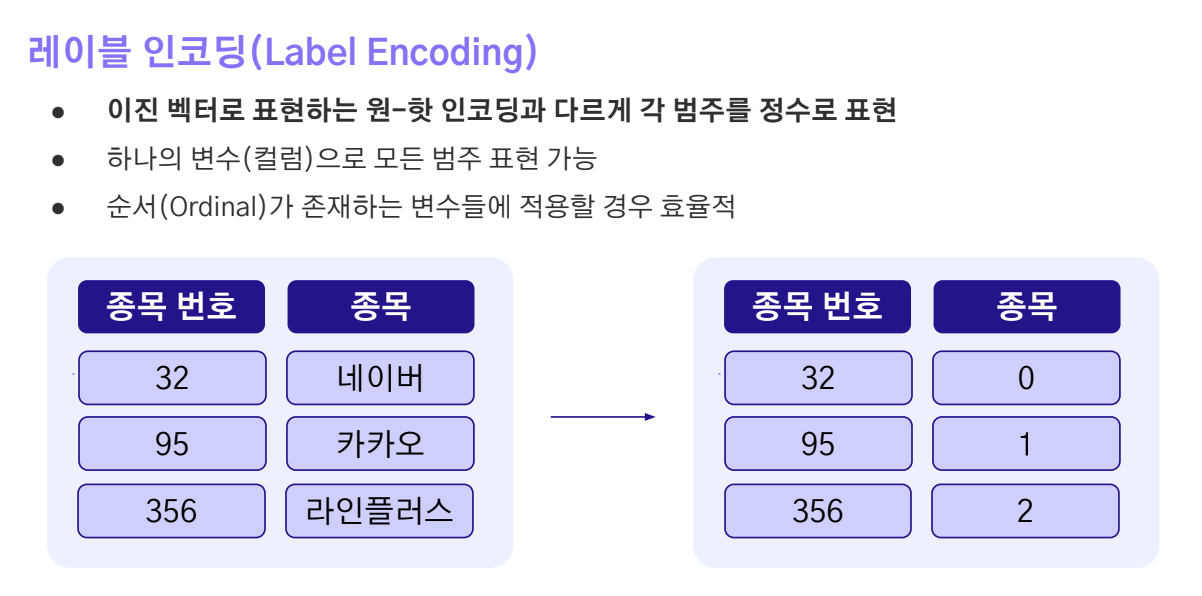

In [376]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'target', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'mean', 'MA_3', 'MA_6', 'EMA_3', 'EMA_6', 'pct_change_before', 'lag_mean_1', 'lag_mean_2', 'lag_mean_3', 'lag_mean_4', 'lag_mean_5']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'ÎèÑÎ°úÎ™Ö', 'Íµ¨Î∂Ñ', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']


In [ ]:
### ÏïÑÎûò Î†àÏù¥Î∏îÏù∏ÏΩîÎî© 8Î∂Ñ2Ï¥à Í±∏Î¶º

In [377]:
%%time
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:00<00:00, 476.17it/s]

CPU times: user 19.3 ms, sys: 781 ¬µs, total: 20.1 ms
Wall time: 19.9 ms


In [378]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏãúÍµ∞Íµ¨   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  ÎèÑÎ°úÎ™Ö  target  Íµ¨Î∂Ñ  Íµ¨  Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  \
0    0  84.94  200701  4  1995    0   26000   0  0  0    0    0     0     0   

      mean  MA_3  MA_6  EMA_3  EMA_6  pct_change_before  lag_mean_1  \
0  25850.0   NaN   NaN    NaN    NaN                NaN     25850.0   

   lag_mean_2  lag_mean_3  lag_mean_4  lag_mean_5  
0     25850.0     25850.0     25850.0     25850.0

In [379]:
### ÎÇ¥Ïö©Î≥¥Í∏∞
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 0 to 2079
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ÏãúÍµ∞Íµ¨                2080 non-null   int64  
 1   Ï†ÑÏö©Î©¥Ï†Å               2080 non-null   float64
 2   Í≥ÑÏïΩÎÖÑÏõî               2080 non-null   int64  
 3   Ï∏µ                  2080 non-null   int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ               2080 non-null   int64  
 5   ÎèÑÎ°úÎ™Ö                2080 non-null   int64  
 6   target             2080 non-null   int64  
 7   Íµ¨Î∂Ñ                 2080 non-null   int64  
 8   Íµ¨                  2080 non-null   int64  
 9   Îèô                  2080 non-null   int64  
 10  Í≥ÑÏïΩÎÖÑ                2080 non-null   int64  
 11  Í≥ÑÏïΩÏõî                2080 non-null   int64  
 12  Í∞ïÎÇ®Ïó¨Î∂Ä               2080 non-null   int64  
 13  Ïã†Ï∂ïÏó¨Î∂Ä               2080 non-null   int64  
 14  mean               2080 non-null   float64
 15  MA_

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ RandomForestÎ•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- TrainÍ≥º Valid datasetÏùÑ Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî `holdout` Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Î∞©Î≤ïÏùò Í≤ΩÏö∞  ÎåÄÎûµÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú baselineÏóêÏÑú ÏÇ¨Ïö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïù¥ ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ edaÎ•º ÌÜµÌï¥ÏÑú ÌèâÍ∞ÄÏÑ∏Ìä∏ÏôÄ Í≤ΩÌñ•ÏùÑ ÎßûÏ∂îÍ±∞ÎÇò kfoldÏôÄ Í∞ôÏùÄ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í≥†Î†§Î•º Ï∂îÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [380]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [381]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [383]:
X_train.fillna(method='bfill', inplace=True)
X_train.fillna(method='ffill', inplace=True)
X_val.fillna(method='bfill', inplace=True)
X_val.fillna(method='ffill', inplace=True)

In [384]:
%%time
# RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
### Ï†ÑÏ≤¥ 4Î∂ÑÍ±∏Î¶º
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

CPU times: user 90.2 ms, sys: 4.6 ms, total: 94.8 ms
Wall time: 128 ms


- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≤ÉÎèÑ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [385]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.

# Ï†ÑÏ≤¥Ïóê ÎåÄÌï¥ RMSE test: 2262.0626330912496


print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 1956.034578860734


###### baseline - RMSE test: 5851.882141463051




```
<class 'pandas.core.frame.DataFrame'>
Index: 1038846 entries, 0 to 9271
Data columns (total 49 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Î≤àÏßÄ                      1038846 non-null  object
 1   Î≥∏Î≤à                      1038846 non-null  object
 2   Î∂ÄÎ≤à                      1038846 non-null  object
 3   ÏïÑÌååÌä∏Î™Ö                    1038846 non-null  object
 4   Ï†ÑÏö©Î©¥Ï†Å                    1038846 non-null  float64
 5   Í≥ÑÏïΩÏùº                     1038846 non-null  int64  
 6   Ï∏µ                       1038846 non-null  int64  
 7   Í±¥Ï∂ïÎÖÑÎèÑ                    1038846 non-null  int64  
 8   ÎèÑÎ°úÎ™Ö                     1038846 non-null  object
 9   k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      1038846 non-null  object
 10  k-Ï†ÑÌôîÎ≤àÌò∏                  1038846 non-null  object
 11  k-Ìå©Ïä§Î≤àÌò∏                  1038846 non-null  object
 12  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)            1038846 non-null  object
 13  k-Í¥ÄÎ¶¨Î∞©Ïãù                  1038846 non-null  object
 14  k-Î≥µÎèÑÏú†Ìòï                  1038846 non-null  object
 15  k-ÎÇúÎ∞©Î∞©Ïãù                  1038846 non-null  object
 16  k-Ï†ÑÏ≤¥ÎèôÏàò                  1038846 non-null  float64
 17  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 1038846 non-null  float64
 18  k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              1038846 non-null  object
 19  k-ÏãúÌñâÏÇ¨                   1038846 non-null  object
 20  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº           1038846 non-null  object
 21  k-Ïó∞Î©¥Ï†Å                   1038846 non-null  float64
 22  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                1038846 non-null  float64
 23  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å               1038846 non-null  float64
 24  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)      1038846 non-null  float64
 25  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  1038846 non-null  float64
 26  k-85„é°~135„é°Ïù¥Ìïò            1038846 non-null  float64
 27  k-ÏàòÏ†ïÏùºÏûê                  1038846 non-null  object
 28  Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏                1038846 non-null  object
 29  Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                 1038846 non-null  object
 30  ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï                1038846 non-null  object
 31  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                 1038846 non-null  object
 32  Í±¥Ï∂ïÎ©¥Ï†Å                    1038846 non-null  float64
 33  Ï£ºÏ∞®ÎåÄÏàò                    1038846 non-null  float64
 34  Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4     1038846 non-null  object
 35  Îã®ÏßÄÏäπÏù∏Ïùº                   1038846 non-null  object
 36  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä                  1038846 non-null  object
 37  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú                 1038846 non-null  object
 38  Ï¢åÌëúX                     1038846 non-null  float64
 39  Ï¢åÌëúY                     1038846 non-null  float64
 40  Îã®ÏßÄÏã†Ï≤≠Ïùº                   1038846 non-null  object
 41  target                  1038846 non-null  float64
 42  is_test                 1038846 non-null  int64  
 43  Íµ¨                       1038846 non-null  object
 44  Îèô                       1038846 non-null  object
 45  Í≥ÑÏïΩÎÖÑ                     1038846 non-null  object
 46  Í≥ÑÏïΩÏõî                     1038846 non-null  object
 47  Í∞ïÎÇ®Ïó¨Î∂Ä                    1038846 non-null  int64  
 48  Ïã†Ï∂ïÏó¨Î∂Ä                    1038846 non-null  int64  
dtypes: float64(14), int64(6), object(29)
memory usage: 396.3+ MB```



###### base - RMSE test: 5708.848177198493


```
<class 'pandas.core.frame.DataFrame'>
Index: 1038846 entries, 0 to 1128093
Data columns (total 15 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   ÏãúÍµ∞Íµ¨      1038846 non-null  object
 1   Ï†ÑÏö©Î©¥Ï†Å     1038846 non-null  float64
 2   Í≥ÑÏïΩÎÖÑÏõî     1038846 non-null  int64  
 3   Ï∏µ        1038846 non-null  int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ     1038846 non-null  int64  
 5   ÎèÑÎ°úÎ™Ö      1038846 non-null  object
 6   target   1038846 non-null  int64  
 7   is_test  1038846 non-null  int64  
 8   Íµ¨Î∂Ñ       1038846 non-null  object
 9   Íµ¨        1038846 non-null  object
 10  Îèô        1038846 non-null  object
 11  Í≥ÑÏïΩÎÖÑ      1038846 non-null  object
 12  Í≥ÑÏïΩÏõî      1038846 non-null  object
 13  Í∞ïÎÇ®Ïó¨Î∂Ä     1038846 non-null  int64  
 14  Ïã†Ï∂ïÏó¨Î∂Ä     1038846 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 126.8+ MB
```



###### sample - RMSE test: 1956.034578860734
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94	- 2100Í∞ú

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ÏãúÍµ∞Íµ¨                2100 non-null   object
 1   Ï†ÑÏö©Î©¥Ï†Å               2100 non-null   float64
 2   Í≥ÑÏïΩÎÖÑÏõî               2100 non-null   int64  
 3   Ï∏µ                  2100 non-null   int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ               2100 non-null   int64  
 5   ÎèÑÎ°úÎ™Ö                2100 non-null   object
 6   target             2100 non-null   int64  
 7   is_test            2100 non-null   int64  
 8   index_num          2100 non-null   int64  
 9   Íµ¨Î∂Ñ                 2100 non-null   object
 10  Íµ¨Î∂Ñdate             2100 non-null   object
 11  Íµ¨Î∂Ñnum              2100 non-null   int64  
 12  Íµ¨                  2100 non-null   object
 13  Îèô                  2100 non-null   object
 14  Í≥ÑÏïΩÎÖÑ                2100 non-null   object
 15  Í≥ÑÏïΩÏõî                2100 non-null   object
 16  Í∞ïÎÇ®Ïó¨Î∂Ä               2100 non-null   int64  
 17  Ïã†Ï∂ïÏó¨Î∂Ä               2100 non-null   int64  
 18  mean               2100 non-null   float64
 19  MA_3               2091 non-null   float64
 20  MA_6               2075 non-null   float64
 21  EMA_3              2091 non-null   float64
 22  EMA_6              2075 non-null   float64
 23  pct_change_before  2089 non-null   float64
 24  lag_mean_1         2100 non-null   float64
 25  lag_mean_2         2100 non-null   float64
 26  lag_mean_3         2100 non-null   float64
 27  lag_mean_4         2100 non-null   float64
 28  lag_mean_5         2100 non-null   float64
dtypes: float64(12), int64(9), object(8)
memory usage: 475.9+ KB
```



###### base2

In [ ]:
base.info()

- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [ ]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
%%time
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.   2Î∂ÑÍ±∏Î¶º
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = 'neg_mean_squared_error',        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
X_val['pred'] = pred

In [ ]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [ ]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [ ]:
X_val_sort.head()

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [ ]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [ ]:
display(error_top100.head(1))
display(best_top100.head(1))

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

In [ ]:
sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6 . Inference (Ï∂îÎ°†)

In [ ]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
dt_test

In [ ]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
X_test = dt_test.drop(['target'], axis=1)

In [ ]:
X_test.isna().sum()

In [ ]:
%%time

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

In [ ]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 7 . Output File Save

In [ ]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)

In [ ]:
preds_df.to_csv('/content/drive/MyDrive/AILAB_Advance/output.csv', index=False)


# Í∏∞ÌÉÄ : ÌïúÍ∏Ä Îã§Ïãú ÏÑ§Ïπò

In [ ]:
### ÌïúÍ∏Ä Îã§Ïãú ÏÑ§Ïπò
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/192 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]